### Goal of Model:

***Advanced data preparation:*** Build an ‘enriched’ customer profile by deriving “intelligent” KPIs such as:
    
    1- Monthly average purchase and cash advance amount
    
    2- Purchases by type (one-off, installments)
    
    3- Average amount per purchase and cash advance transaction,
    
    4- Limit usage (balance to credit limit ratio),
    
    5- Payments to minimum payments ratio etc.
    
    6- Advanced reporting: Use the derived KPIs to gain insight on the customer profiles.
    
    7- Identification of the relationships/ affinities between services.
    
    8- Clustering: Apply a data reduction technique factor analysis for variable reduction technique and a clustering algorithm  to reveal the behavioural segments of credit card holders
    
    9- Identify cluster characterisitics of the cluster using detailed profiling.
    
    10- Provide the strategic insights and implementation of strategies for given set of cluster characteristics

### DATA DICTIONARY:

***CUST_ID:*** Identificación del titular de la tarjeta de crédito

***BALANCE:*** Saldo promedio mensual (basado en promedios de saldo diario)

***BALANCE_FREQUENCY:*** Relación de los últimos 12 meses con saldo

***PURCHASES:*** Importe total de la compra gastada durante los últimos 12 meses

***ONEOFF_PURCHASES:*** Importe total de la compra gastada durante los últimos 12 meses

***INSTALLMENTS_PURCHASES:*** Monto total de compras a plazos

***CASH_ADVANCE:*** Importe total del anticipo en efectivo

***PURCHASES_ FREQUENCY:*** Frecuencia de compras (Porcentaje de meses con al menos una compra)

***ONEOFF_PURCHASES_FREQUENCY:*** Frecuencia de compras únicas

***PURCHASES_INSTALLMENTS_FREQUENCY***: Frecuencia de compras a plazos

***CASH_ADVANCE_ FREQUENCY:*** Frecuencia de anticipos en efectivo

***AVERAGE_PURCHASE_TRX:*** Monto promedio por transacción de compra

***CASH_ADVANCE_TRX:*** Monto promedio por transacción de anticipo en efectivo

***PURCHASES_TRX:*** Monto por transacción

***CREDIT_LIMIT:*** Limite de crédito

***PAYMENTS:*** Pagos totales (monto adeuda pagado por el cliente para disminuir el saldo de su estado de cuenta) en el período

***MINIMUM_PAYMENTS:*** Pagos mínimos totales adeudados en el período

***PRC_FULL_PAYMEN:*** Porcentaje de meses con pago total del saldo adeudado

***TENURE:*** Número de meses como cliente

##  >> Importando las librerías

In [1]:
#Basic python library which need to import
import pandas as pd
import numpy as np

#Date stuff
from datetime import datetime
from datetime import timedelta

#Library for Nice graphing
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn
%matplotlib inline

#Library for statistics operation
import scipy.stats as stats

# Date Time library
from datetime import datetime

#Machine learning Library
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
#np.set_printoptions(threshold=np.nan)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## >> Cargando los datos

In [2]:
credit= pd.read_csv("comportamiento_tc.csv")
credit.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [3]:
credit.shape

(8950, 18)

## >> Informaicón general

In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Encontrando el número total de valores nulos
print ("\nMissing values :  ", credit.isnull().sum().values.sum())

# Imprimendo los valores únicos 
print ("\nUnique values :  \n",credit.nunique())


Missing values :   314

Unique values :  
 CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64


## >> Analisis descriptivo

In [6]:
# Descripción inicial de los datos
credit.describe(percentiles=[0.01,.1, .3, 0.5, 0.7, 0.9, 0.99]).T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          1%          10%          30%  \
BALANCE                             0.065101    23.575529   207.176552   
BALANCE_FREQUENCY                   0.090909     0.454545     0.909091   
PURCHASES                           0.000000     0.000000    89.285000   
ONEOFF_PURCHASES                    0.000000     0.000000     0.000000   
INSTALLMENTS_PURCHASES              0.000000     0.000000     0.000000   
CASH_ADVANCE                        0.000000     0.000000     0.000000   
PURCHASES_FREQUENCY                 0.000000     0.000000     0.083333   
ONEOFF_PURCHASES_FREQUENCY          0.000000     0.000000     0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000     0.000000     0.000000   
CASH_ADVANCE_FREQUENCY              0.000000     0.000000     0.000000   
CASH_ADVANCE_TRX                    0.000000     0.000000     0.000000   
PURCHASES_TRX                       0.000000     0.000000     1.000000   
CREDIT_LIMIT                      500.000000  1200.000000  2000.000000   
PAYMENTS                            0.000000   179.617069   459.438287   
MINIMUM_PAYMENTS                   19.524478   106.034864   178.851603   
PRC_FULL_PAYMENT                    0.000000     0.000000     0.000000   
TENURE                              6.000000    10.000000    12.000000   

                                          50%          70%          90%  \
BALANCE                            873.385231  1698.588855  4338.563657   
BALANCE_FREQUENCY                    1.000000     1.000000     1.000000   
PURCHASES                          361.280000   894.316000  2542.624000   
ONEOFF_PURCHASES                    38.000000   400.155000  1600.099000   
INSTALLMENTS_PURCHASES              89.000000   371.139000  1140.070000   
CASH_ADVANCE                         0.000000   797.272297  3065.534560   
PURCHASES_FREQUENCY                  0.500000     0.857143     1.000000   
ONEOFF_PURCHASES_FREQUENCY           0.083333     0.222222     0.750000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.166667     0.666667     1.000000   
CASH_ADVANCE_FREQUENCY               0.000000     0.166667     0.416667   
CASH_ADVANCE_TRX                     0.000000     3.000000    10.000000   
PURCHASES_TRX                        7.000000    13.000000    37.000000   
CREDIT_LIMIT                      3000.000000  6000.000000  9500.000000   
PAYMENTS                           856.901546  1604.092113  3923.906642   
MINIMUM_PAYMENTS                   312.343947   671.283261  1780.651744   
PRC_FULL_PAYMENT                     0.0000

## >> Tratamientos de nulos

In [7]:
(credit.isnull().sum() / len(credit)).apply(lambda _: str(round(_, 3)*100) + ' %')

CUST_ID                                            0.0 %
BALANCE                                            0.0 %
BALANCE_FREQUENCY                                  0.0 %
PURCHASES                                          0.0 %
ONEOFF_PURCHASES                                   0.0 %
INSTALLMENTS_PURCHASES                             0.0 %
CASH_ADVANCE                                       0.0 %
PURCHASES_FREQUENCY                                0.0 %
ONEOFF_PURCHASES_FREQUENCY                         0.0 %
PURCHASES_INSTALLMENTS_FREQUENCY                   0.0 %
CASH_ADVANCE_FREQUENCY                             0.0 %
CASH_ADVANCE_TRX                                   0.0 %
PURCHASES_TRX                                      0.0 %
CREDIT_LIMIT                                       0.0 %
PAYMENTS                                           0.0 %
MINIMUM_PAYMENTS                    3.5000000000000004 %
PRC_FULL_PAYMENT                                   0.0 %
TENURE                         

In [8]:
credit['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [9]:
indices_nulos_min_payments = credit[credit['MINIMUM_PAYMENTS'].isnull()].index
len(indices_nulos_min_payments)

313

In [10]:
usuarios = credit['CUST_ID'].copy()
del credit['CUST_ID']

In [11]:
from sklearn.impute import KNNImputer

knn_imp = KNNImputer(n_neighbors=3)
credit = pd.DataFrame(knn_imp.fit_transform(credit), columns=credit.columns)

In [12]:
credit.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
credit.iloc[indices_nulos_min_payments]['MINIMUM_PAYMENTS'].describe()

count      313.000000
mean       580.674372
std       1656.789195
min          9.644271
25%         89.057424
50%        140.536647
75%        292.980844
max      16128.831462
Name: MINIMUM_PAYMENTS, dtype: float64

## >> FEATURE ENGINEERING

#### Monthly_avg_purchase

In [14]:
#compras promedio por meses con la tarjeta
credit['Monthly_avg_purchase'] = credit['PURCHASES'] / credit['TENURE']

<AxesSubplot:>

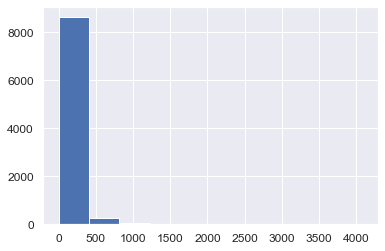

In [15]:
credit['Monthly_avg_purchase'].hist()

#### Monthly_cash_advance Amount

In [16]:
#Adelanto de efectivo por mes
credit['Monthly_cash_advance']=credit['CASH_ADVANCE']/credit['TENURE']

In [17]:
credit[credit['ONEOFF_PURCHASES']==0]['ONEOFF_PURCHASES'].count()

4302

#### 2- Purchases by type (one-off, installments)

- To find what type of purchases customers are making on credit card

In [18]:
credit.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES
0                 0.00                   95.40
1                 0.00                    0.00
2               773.17                    0.00
3              1499.00                    0.00
4                16.00                    0.00
...                ...                     ...
8945              0.00                  291.12
8946              0.00                  300.00
8947              0.00                  144.40
8948              0.00                    0.00
8949           1093.25                    0.00

[8950 rows x 2 columns]

#### Find customers ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES details

#### 4. Limit_usage (balance to credit limit ratio ) credit card utilization
   - Lower value implies cutomers are maintaing thier balance properly. Lower value means good credit score

In [19]:
credit['limit_usage']=credit.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

In [20]:
credit['limit_usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

#### 5- Payments to minimum payments ratio etc.

In [21]:
credit['PAYMENTS'].isnull().any()
credit['MINIMUM_PAYMENTS'].isnull().value_counts()

False    8950
Name: MINIMUM_PAYMENTS, dtype: int64

In [22]:
credit['payment_minpay']=credit.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'], axis=1)

<AxesSubplot:>

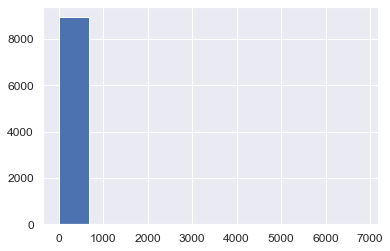

In [23]:
credit['payment_minpay'].hist()

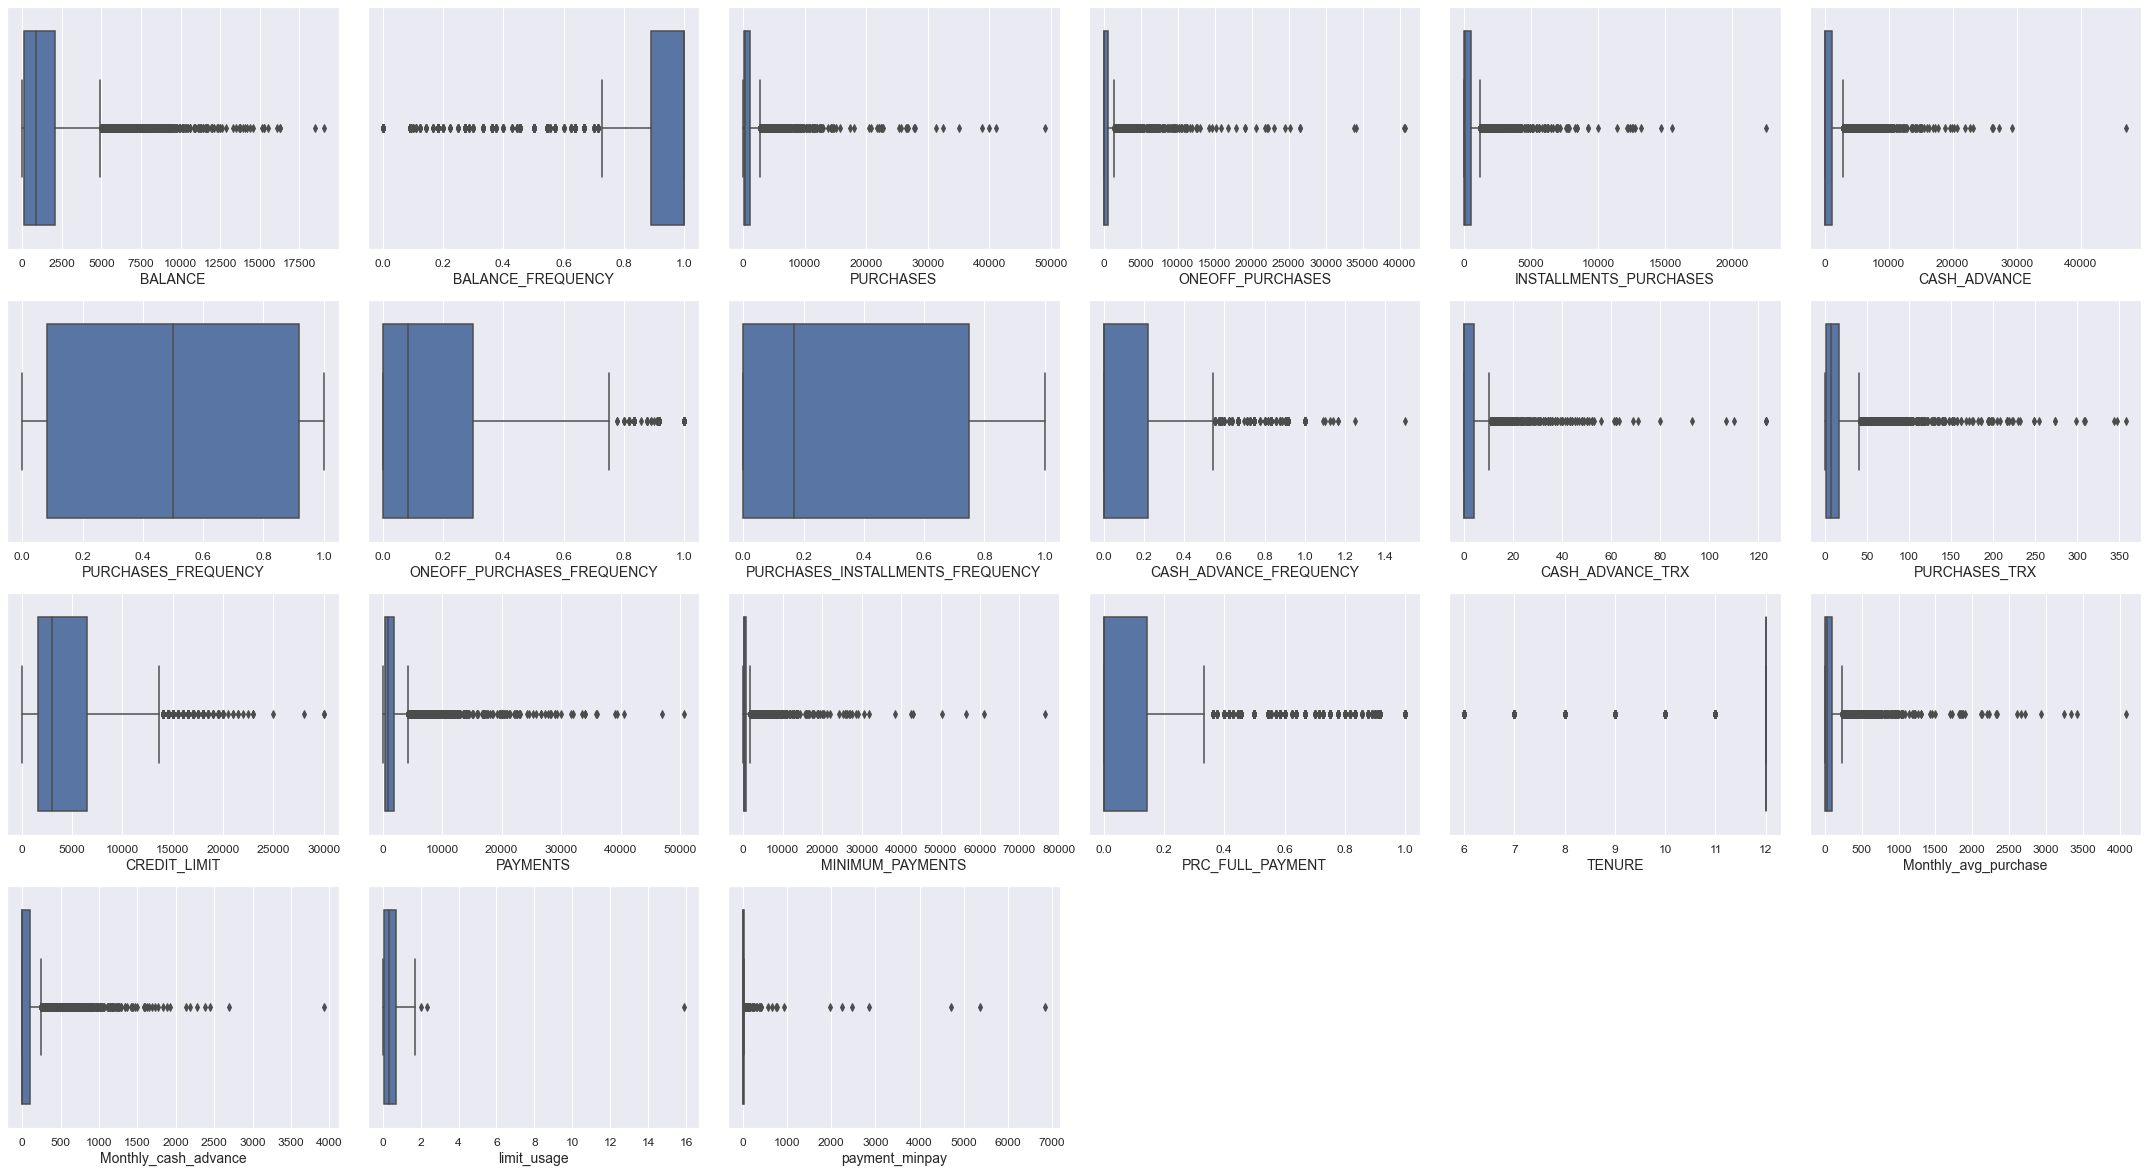

In [24]:
fig = plt.figure(figsize=(30, 20))
for idx, col in enumerate(credit.columns, 1):
    ax = fig.add_subplot(5, 6, idx)
    sns.boxplot(x=credit[col], ax=ax)

plt.tight_layout()

####  Tratamiento de valores extremos
- Dado que hay variables que tienen valores extremos, estoy haciendo una transformación de registro en el conjunto de datos para eliminar el efecto de valores atípicos

In [25]:
for idx, col in enumerate(credit.columns, 1):
    print(idx, col)
    percentil_95 = credit[col].quantile(0.95)
    maximo = credit[col].max()
    print("---------------- percentil 99%: ", round(percentil_95, 2), 'máximo: ', round(maximo, 2), 'relacion máximo/percentil 95: ',maximo/percentil_95)
    
    if maximo/percentil_95 >= 1.5:
        credit[col] = credit[col].apply(lambda _: percentil_95 if _ > percentil_95 else _)

1 BALANCE
---------------- percentil 99%:  5909.11 máximo:  19043.14 relacion máximo/percentil 95:  3.2226735894050984
2 BALANCE_FREQUENCY
---------------- percentil 99%:  1.0 máximo:  1.0 relacion máximo/percentil 95:  1.0
3 PURCHASES
---------------- percentil 99%:  3998.62 máximo:  49039.57 relacion máximo/percentil 95:  12.264125156194538
4 ONEOFF_PURCHASES
---------------- percentil 99%:  2671.09 máximo:  40761.25 relacion máximo/percentil 95:  15.260133113997522
5 INSTALLMENTS_PURCHASES
---------------- percentil 99%:  1750.09 máximo:  22500.0 relacion máximo/percentil 95:  12.856500032141286
6 CASH_ADVANCE
---------------- percentil 99%:  4647.17 máximo:  47137.21 relacion máximo/percentil 95:  10.143209881656663
7 PURCHASES_FREQUENCY
---------------- percentil 99%:  1.0 máximo:  1.0 relacion máximo/percentil 95:  1.0
8 ONEOFF_PURCHASES_FREQUENCY
---------------- percentil 99%:  1.0 máximo:  1.0 relacion máximo/percentil 95:  1.0
9 PURCHASES_INSTALLMENTS_FREQUENCY
--------------

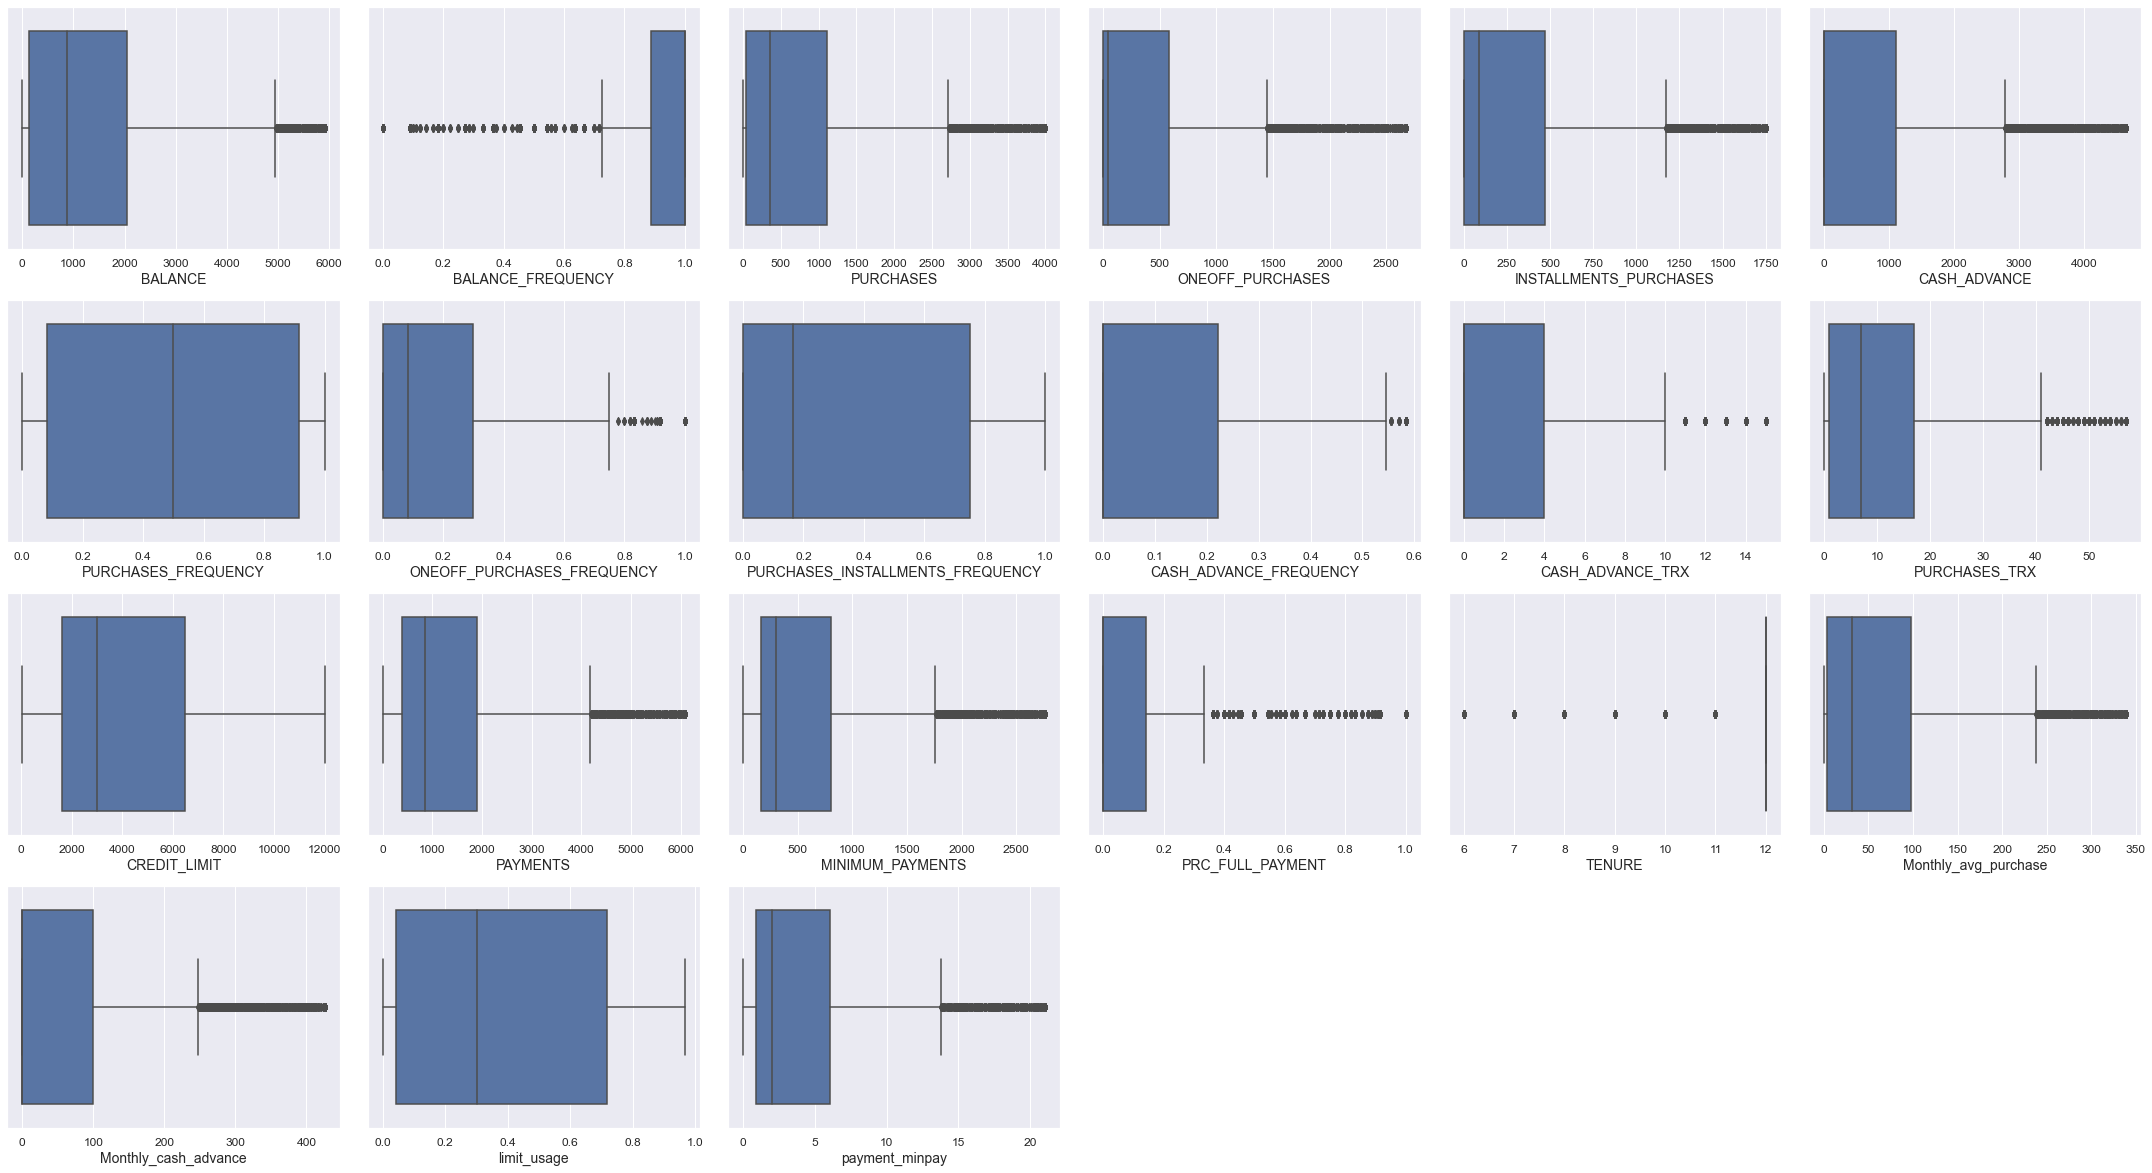

In [26]:
fig = plt.figure(figsize=(30, 20))
for idx, col in enumerate(credit.columns, 1):
    ax = fig.add_subplot(5, 6, idx)
    sns.boxplot(x=credit[col], ax=ax)

plt.tight_layout()

### Análisis de correlaciones 

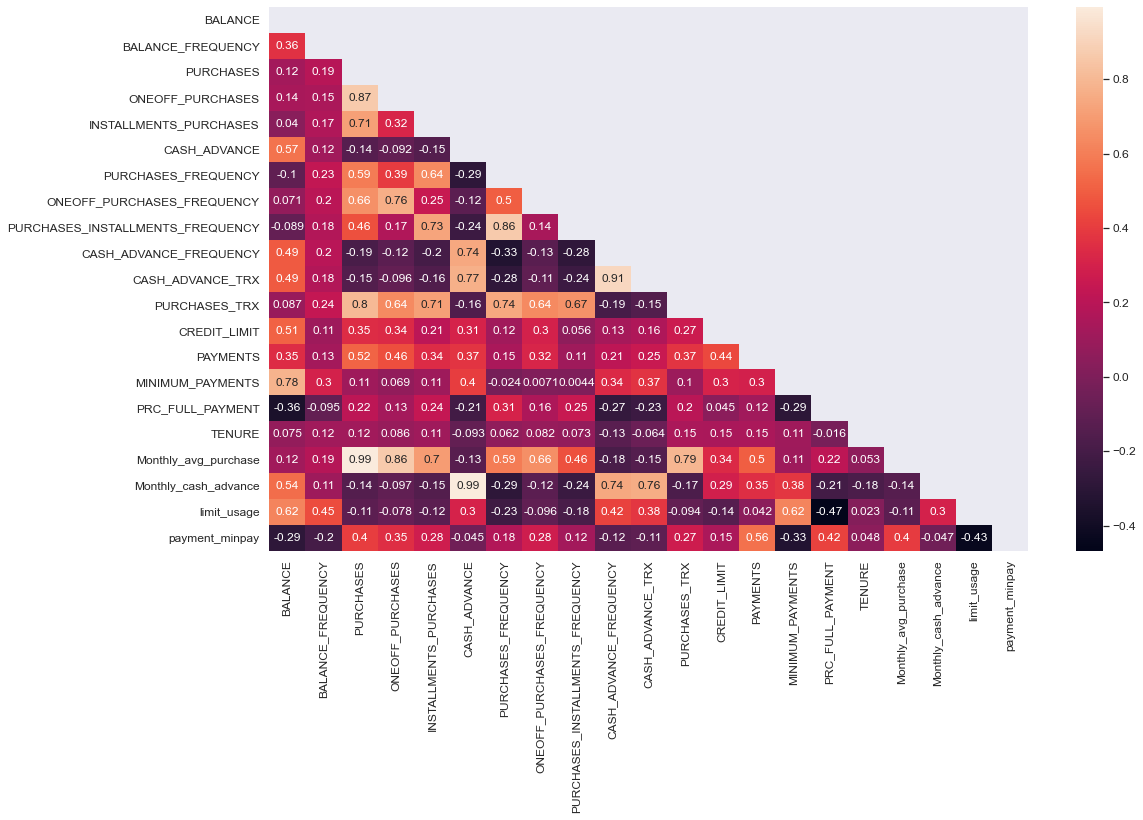

In [27]:
corr = credit.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(17, 10))
sns.heatmap(corr, mask=mask, annot=True)
text = """"""
plt.text(5, 3, text, size=13)
plt.show()

<big>
- El mapa de calor muestra que muchas características están correlacionadas, por lo que la aplicación de la reducción de dimensionalidad ayudará a negar la multicolinealidad en los datos.
</big>


- Antes de aplicar PCA, estandarizaremos los datos para evitar el efecto de la escala en nuestro resultado. El centrado y el escalado harán que todas las funciones tengan el mismo peso.

### Estandarización de datos
- To put data on the same scale 

In [ ]:
from sklearn.preprocessing import  StandardScaler
from sklearn.preprocessing import StandardScaler, normalize

In [29]:
sc = StandardScaler()

In [30]:
#credit = credit.drop('purchase_type', axis=1)

In [31]:
#cr_scaled=sc.fit_transform(credit)

In [32]:
cr_scaled = normalize(credit) 

In [33]:
cr_scaled

array([[3.935e-02, 7.872e-04, 9.179e-02, ..., 0.000e+00, 3.935e-05,
        1.392e-03],
       [3.218e-01, 9.136e-05, 0.000e+00, ..., 4.277e-02, 4.598e-05,
        3.845e-04],
       [3.108e-01, 1.246e-04, 9.630e-02, ..., 0.000e+00, 4.144e-05,
        1.235e-04],
       ...,
       [2.277e-02, 8.108e-04, 1.405e-01, ..., 0.000e+00, 2.277e-05,
        9.594e-04],
       [2.652e-02, 1.642e-03, 0.000e+00, ..., 1.201e-02, 5.304e-05,
        1.857e-03],
       [1.856e-01, 3.320e-04, 5.445e-01, ..., 1.055e-02, 1.547e-04,
        3.563e-04]])

### Applying PCA

**Con la ayuda del análisis de componentes principales reduciremos características**

In [34]:
from sklearn.decomposition import PCA

In [35]:
cr_scaled.shape

(8950, 21)

In [36]:
#We have 21features so our n_component will be 21.
pc=PCA(n_components=3)
cr_pca=pc.fit(cr_scaled)

In [37]:
#Lets check if we will take 17 component then how much varience it explain. Ideally it should be 1 i.e 100%
sum(cr_pca.explained_variance_ratio_)

0.8057347957390916

In [38]:
var_ratio={}
for n in range(1,22):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(cr_scaled)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)

In [39]:
var_ratio

{1: 0.3551379911608868,
 2: 0.6386837875917489,
 3: 0.8057347957390915,
 4: 0.885711189087233,
 5: 0.9456661811908535,
 6: 0.9879626988433592,
 7: 0.9988604082680893,
 8: 0.9997849292839834,
 9: 0.9998897723033796,
 10: 0.9999374849833966,
 11: 0.9999719640094407,
 12: 0.999991484317542,
 13: 0.999996880149869,
 14: 0.999999810398669,
 15: 0.9999998844770808,
 16: 0.9999999319429362,
 17: 0.9999999682038293,
 18: 0.9999999841021584,
 19: 0.9999999966376051,
 20: 0.9999999987156495,
 21: 0.9999999999999999}

***Dado que 10 componentes explican aproximadamente el 90% de la varianza, seleccionamos 9 componentes***

Text(0.5, 0, 'Número de componentes')

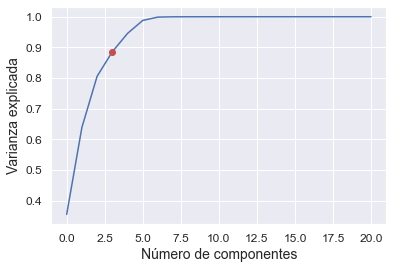

In [40]:
pca_test = PCA().fit(cr_scaled)
plt.plot(pca_test.explained_variance_ratio_.cumsum())
plt.plot([4-1], [0.885], 'ro')
plt.ylabel('Varianza explicada')
plt.xlabel('Número de componentes')

# the following plot tells us the variance we manage to get aganist the number of dimensions.

In [41]:
# Since, we just need PCA to visualize data, we can simply reduce dimensions to 2 or 3. 
# Remember, you can also reduce the Xs to lower dimensions and then apply clustering models.
# Just make sure, you're not losing much variance.
pca_2d = PCA(n_components=4)
Xn_2d = pca_2d.fit_transform(cr_scaled)
normalize_Xs_because = PCA(n_components=7).fit_transform(cr_scaled)

In [42]:
Xn_2d.shape

(8950, 4)

In [43]:
Xn_2d

array([[-0.305, -0.059,  0.024, -0.105],
       [ 0.269, -0.099,  0.301, -0.011],
       [-0.172, -0.193, -0.137,  0.002],
       ...,
       [-0.374, -0.084, -0.011, -0.009],
       [-0.313, -0.197,  0.093, -0.066],
       [-0.098,  0.284, -0.255,  0.502]])

In [44]:
dd=pd.DataFrame(Xn_2d)

In [45]:
dd.head()

0         1         2         3
0 -0.304511 -0.058673  0.023591 -0.105428
1  0.269470 -0.098774  0.300794 -0.010912
2 -0.171516 -0.193099 -0.136532  0.002198
3 -0.259718 -0.139355 -0.131515  0.145562
4  0.171467 -0.060615 -0.103151 -0.260427

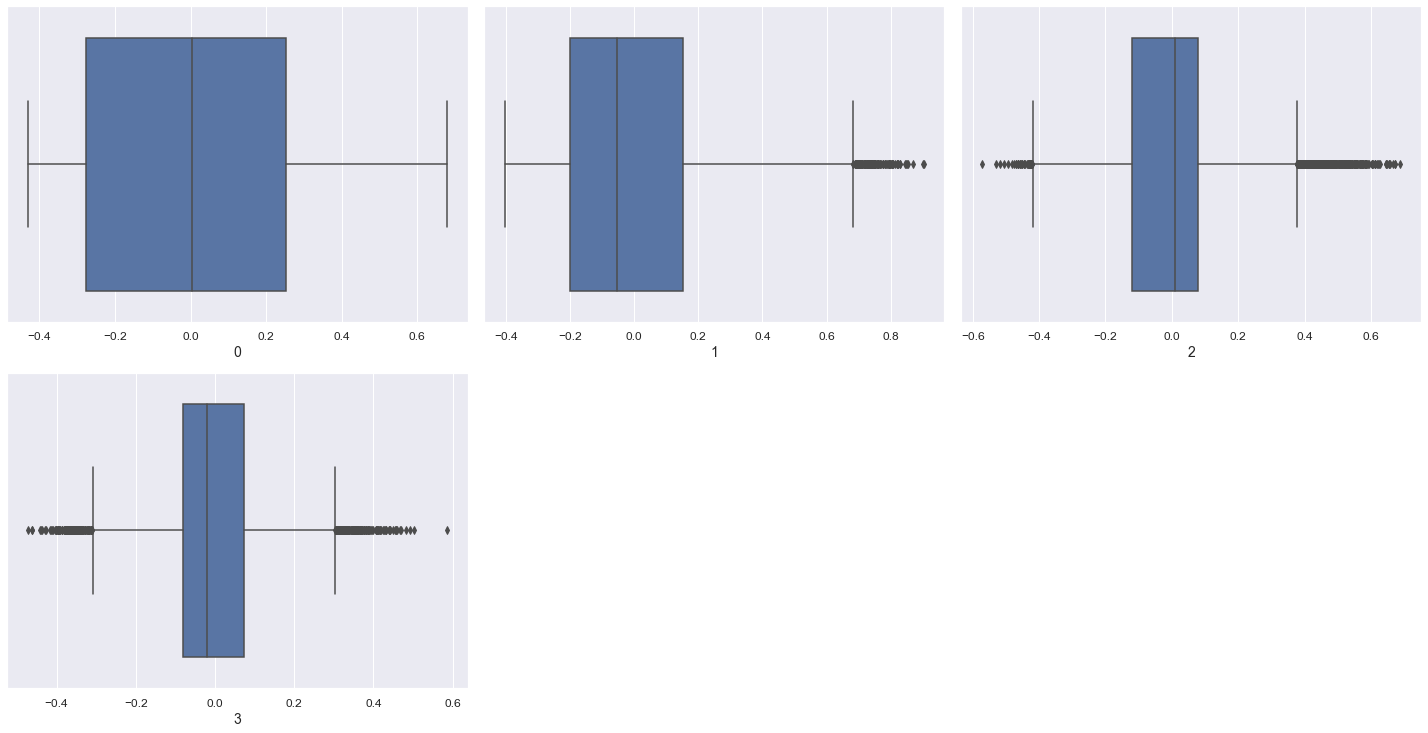

In [46]:
fig = plt.figure(figsize=(20, 20))
for idx, col in enumerate(dd.columns, 1):
    ax = fig.add_subplot(4, 3, idx)
    sns.boxplot(x=dd[col], ax=ax)

plt.tight_layout()

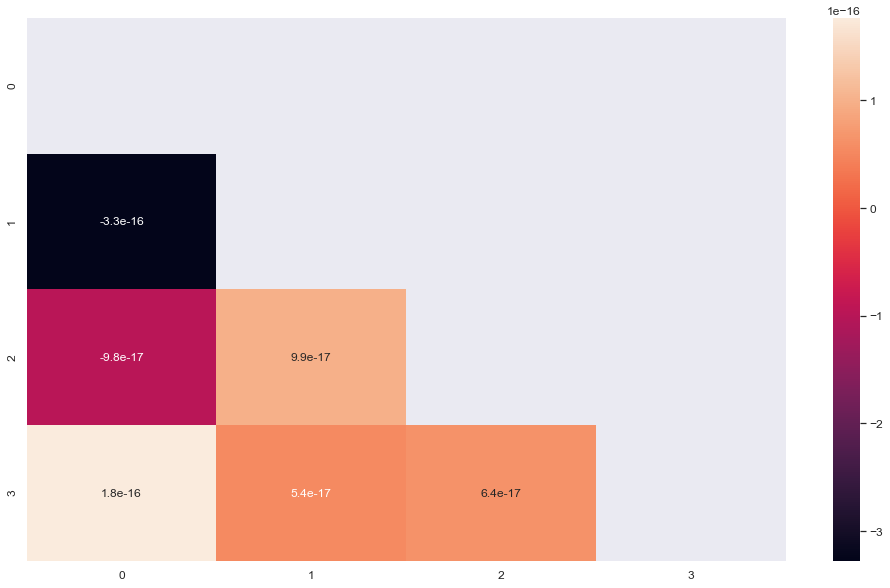

In [47]:
corr = dd.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(17, 10))
sns.heatmap(corr, mask=mask, annot=True)
text = """"""
plt.text(5, 3, text, size=13)
plt.show()

## Analisis cluster con K-Means

In [48]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

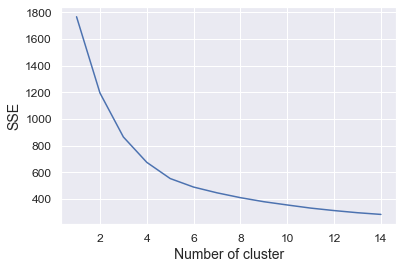

In [49]:
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(dd)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

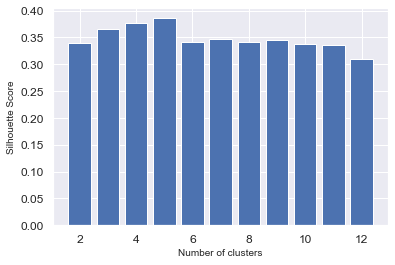

In [50]:
silhouette_scores = []

for n_cluster in range(2, 13):
    silhouette_scores.append( 
        silhouette_score(dd, KMeans(n_clusters = n_cluster).fit_predict(dd))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11, 12] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [51]:
kmeans = KMeans(n_clusters=5).fit(dd)
clusters = kmeans.labels_

pd.DataFrame({"Customers": credit.index, "Clusters": clusters})
credit["cluster_kmeans"] = clusters
credit.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   4647.169122             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000               0.0            2.0        1000.0   
1                0.250000               4.0            0.0        7000.0   
2                0.000000               0.0           12.0        7500.0   
3                0.083333               1.0            1.0        7500.0   
4                0.000000               0.0            1.0        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  \
0   201.802084        139.509787          0.000000    12.0   
1  4103.032597       1072.340217          0.222222    12.0   
2   622.066742        627.284787          0.000000    12.0   
3     0.000000        448.208854          0.000000    12.0   
4   678.334763        244.791237          0.000000    12.0   

   Monthly_avg_purchase  Monthly_cash_advance  limit_usage  payment_minpay  \
0              7.950000              0.000000     0.040901        1.446508   
1              0.000000            425.548562     0.457495        3.826241   
2             64.430833              0.000000     0.332687        0.991682   
3            124.916667             17.149001     0.222223        0.000000   
4              1.333333              0.000000     0.681429        2.771075   

   cluster_kmeans  
0               0  
1               4  
2               0  
3               0  
4               1

In [52]:
silhouette_score(dd, KMeans(n_clusters = 5).fit_predict(dd))

0.38578684940435215

In [53]:
credit["cluster_kmeans"] = credit["cluster_kmeans"] + 1
credit.groupby("cluster_kmeans").agg({"cluster_kmeans": "count"})

cluster_kmeans
cluster_kmeans                
1                         3172
2                         1777
3                         1578
4                          942
5                         1481

In [54]:
credit.groupby("cluster_kmeans").agg(np.mean)

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
cluster_kmeans                                                                  
1                451.574793           0.776462   627.047687        310.930175   
2               2572.052720           0.997615   624.562362        324.383833   
3                902.844847           0.914424  2187.267491       1251.361989   
4               1457.245406           0.864851   412.462506        222.681297   
5               2833.389829           0.917098   293.506877        176.924743   

                INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
cluster_kmeans                                                              
1                           301.311841    109.267195             0.567492   
2                           267.913680    403.650650             0.418039   
3                           794.775952    161.353474             0.802407   
4                           169.163272   2175.738698             0.264298   
5                           111.313663   2664.110650             0.223181   

                ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
cluster_kmeans                                                                 
1                                 0.187204                          0.428514   
2                                 0.160513                          0.314357   
3                                 0.438088                          0.606659   
4                                 0.108171                          0.181420   
5                                 0.094366                          0.145611   

                CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
cluster_kmeans                                                            
1                             0.028274          0.482346      11.576608   
2                             0.133750          2.440630      11.150816   
3                             0.038988          0.731939      27.735108   
4                             0.280452          6.515924       6.588110   
5                             0.330377          7.622552       4.735989   

                CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
cluster_kmeans                                                                  
1                5047.730871   817.287943        219.526698          0.247905   
2                3519.414744   997.565483       1235.174942          0.000937   
3                3717.725768  2442.245786        443.045765          0.289660   
4                3261.115936  3375.225653        661.690273          0.125612   
5                5249.155976  1225.792104        978.047393          0.008315   

                   TENURE  Monthly_avg_purchase  Monthly_cash_advance  \
cluster_kmeans                                                          
1               11.557692             53.870473              9.569510   
2               11.830051             52.916354             34.235296   
3               11.588086            188.416527             13.961609   
4               11.542463             35.640760            193.988953   
5               10.964213             26.956408            245.163912   

                limit_usage  payment_minpay  
cluster_kmeans                               
1                  0.075865        4.706921  
2                  0.827827        0.907322  
3                  0.265970        9.050385  
4                  0.469182        8.613153  
5                  0.582130        1.513186

In [55]:
#credit.mean()

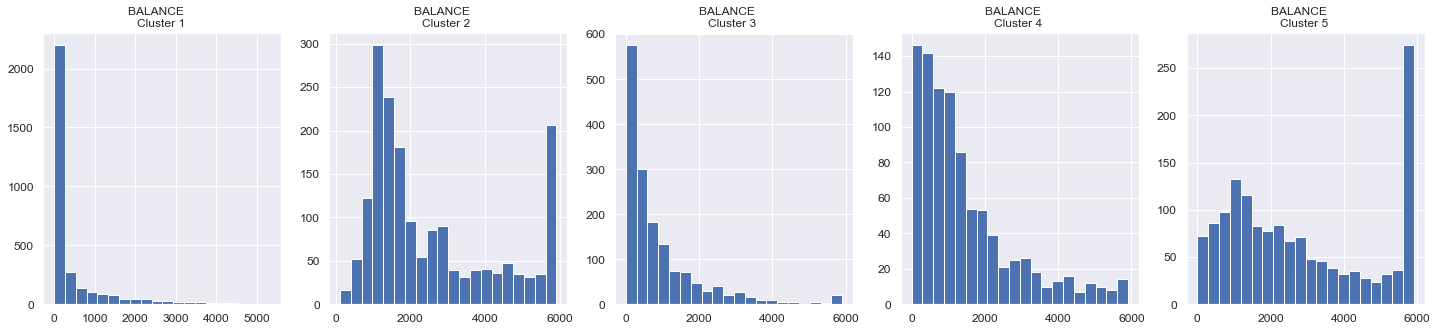

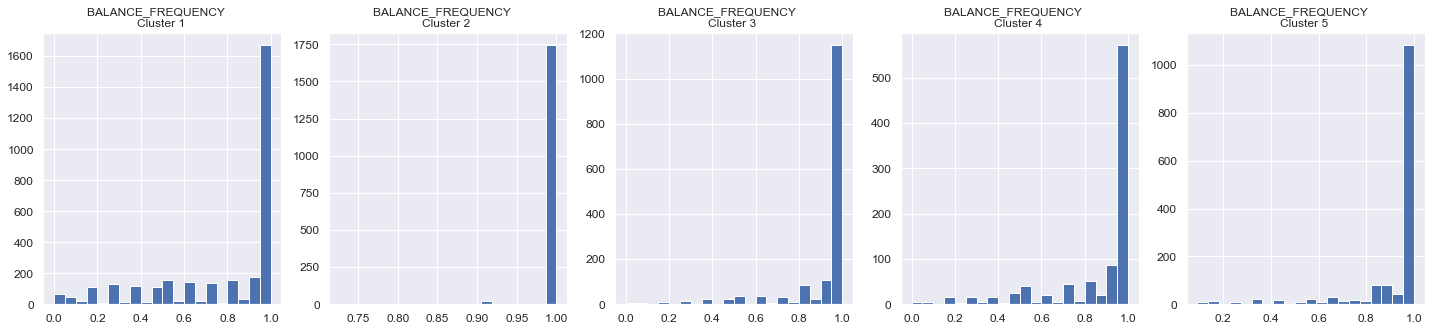

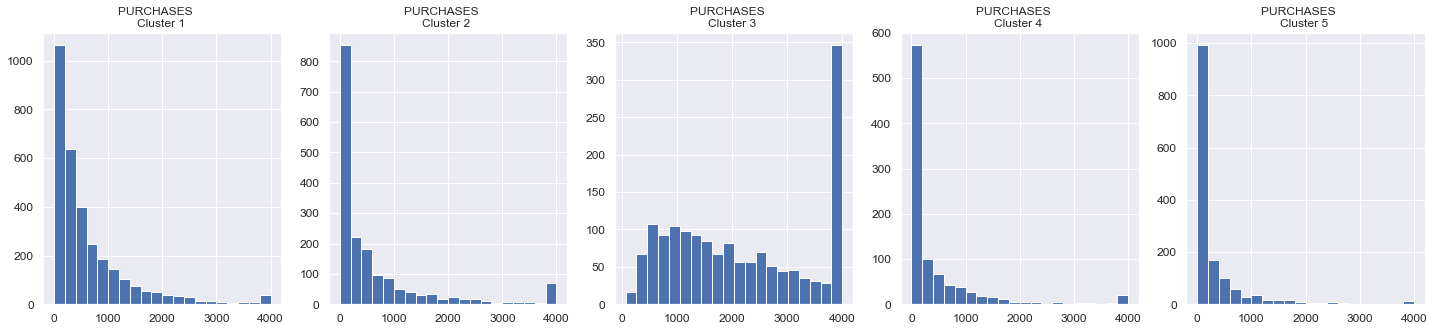

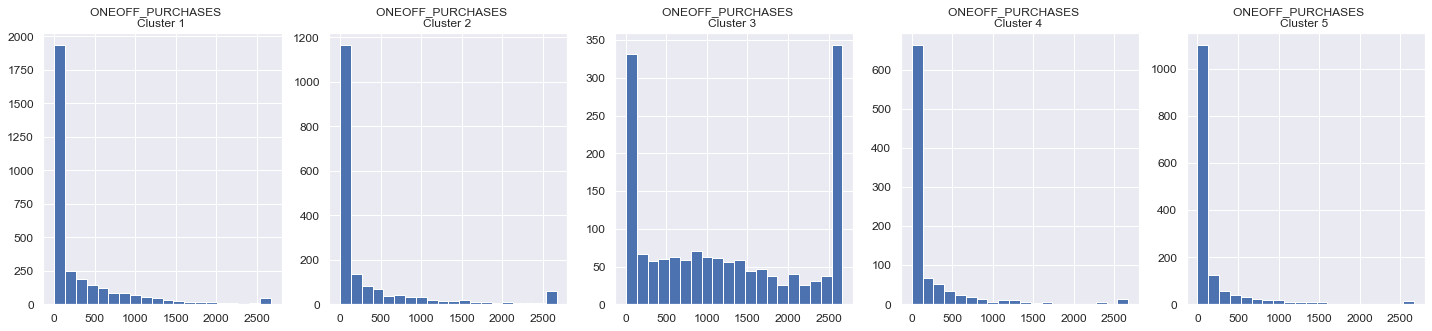

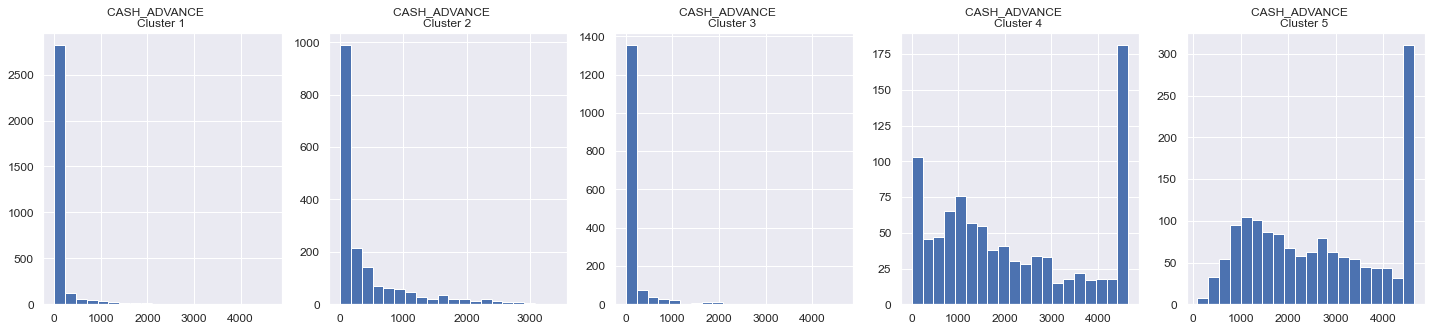

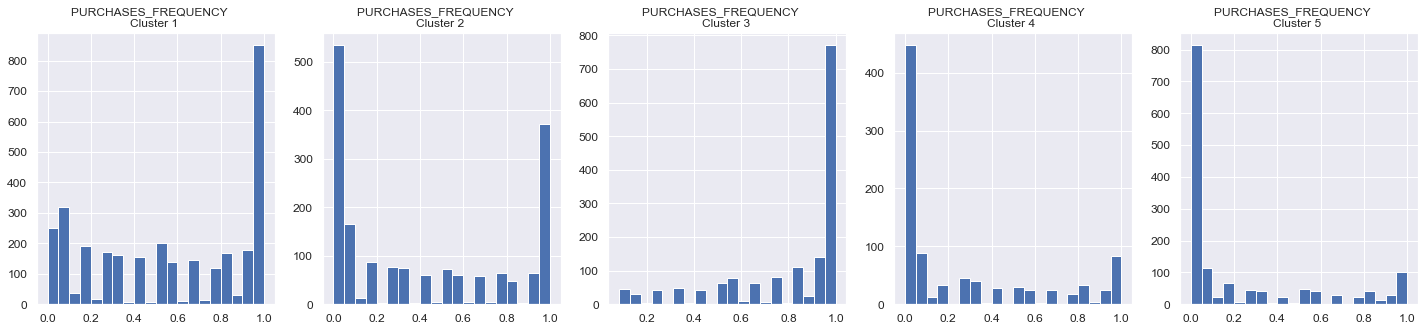

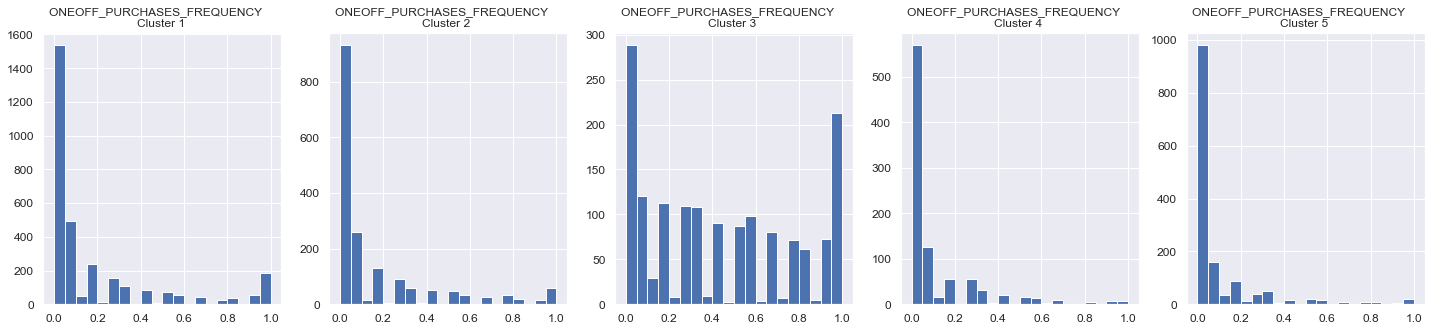

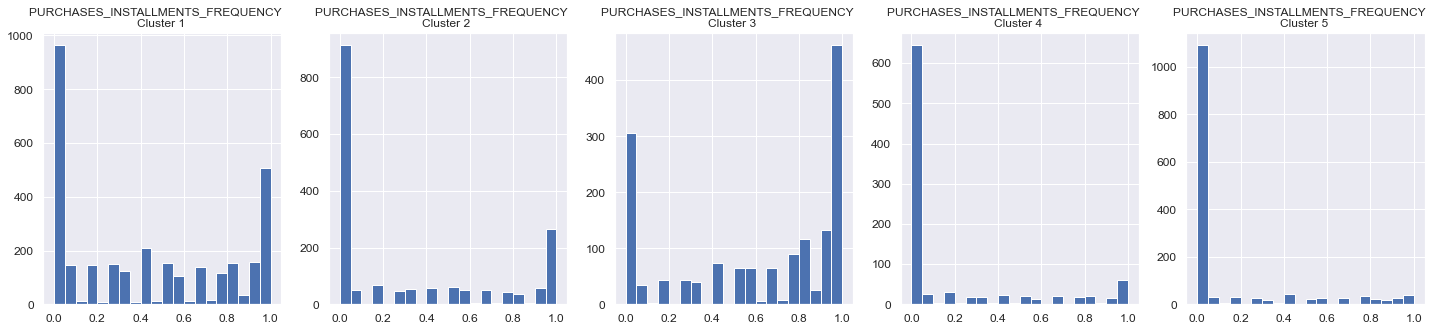

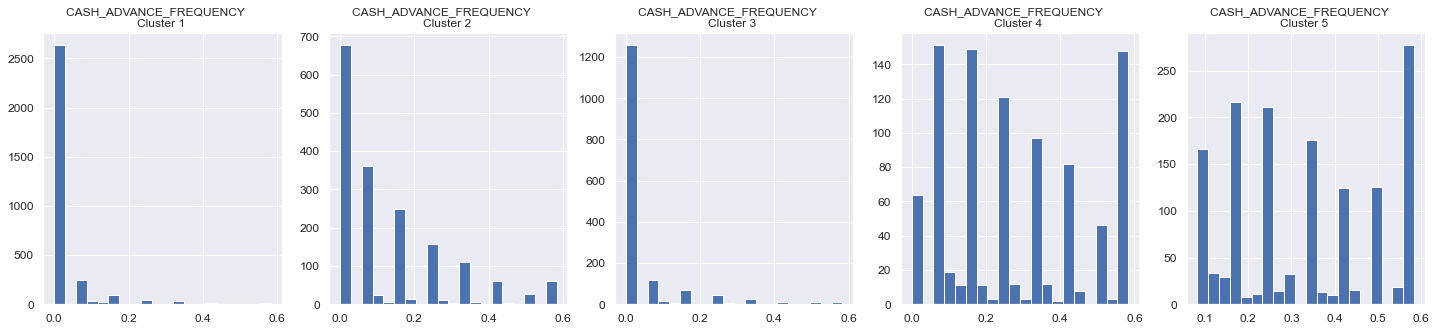

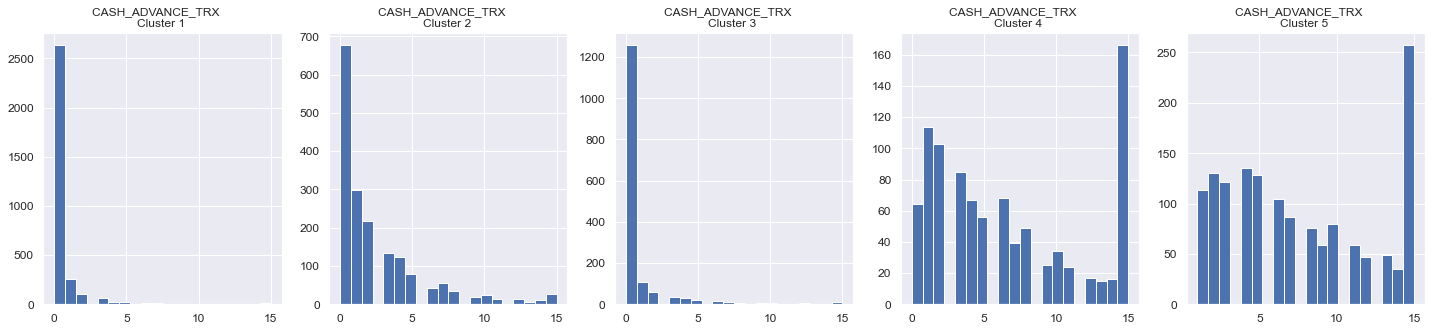

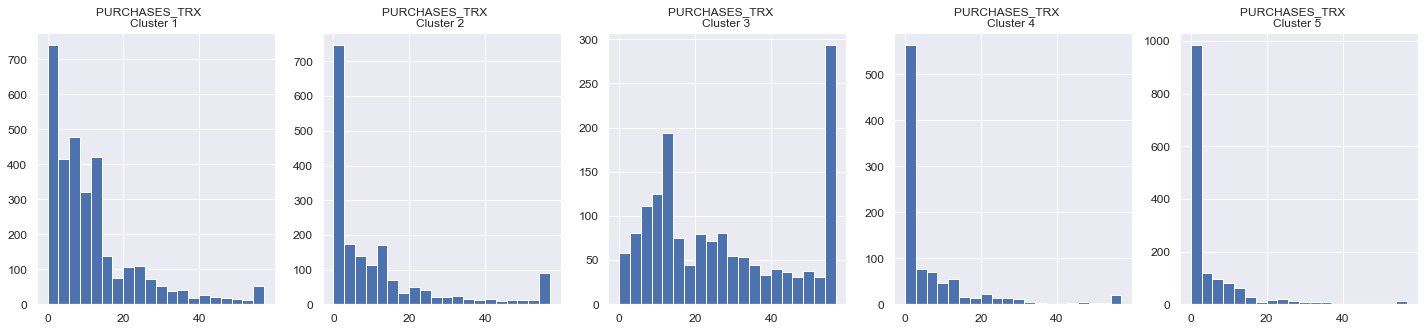

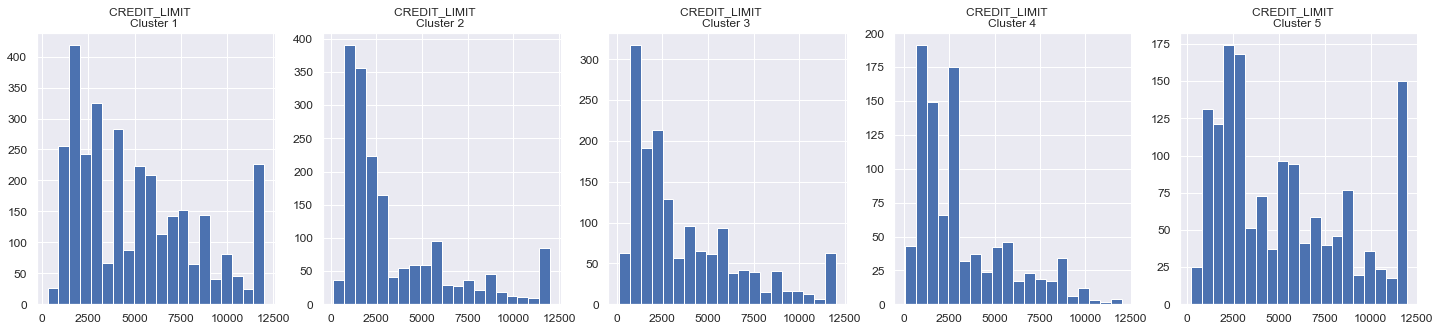

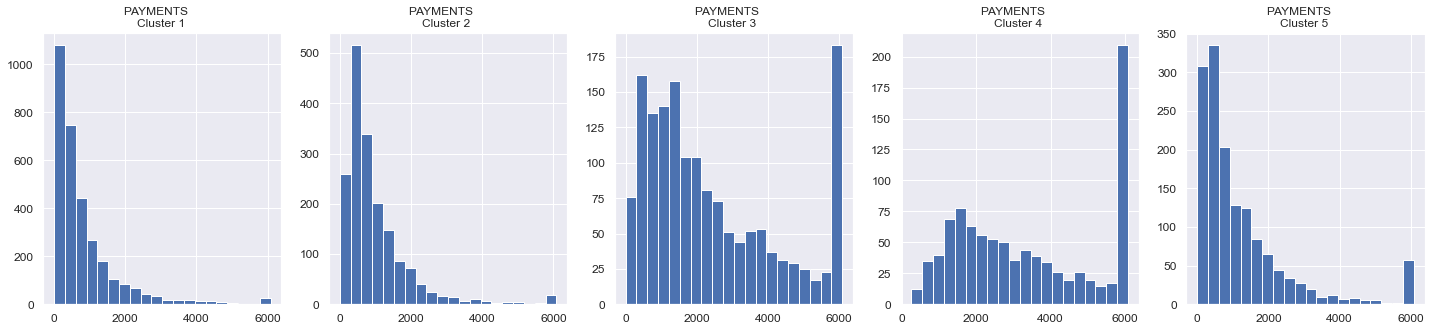

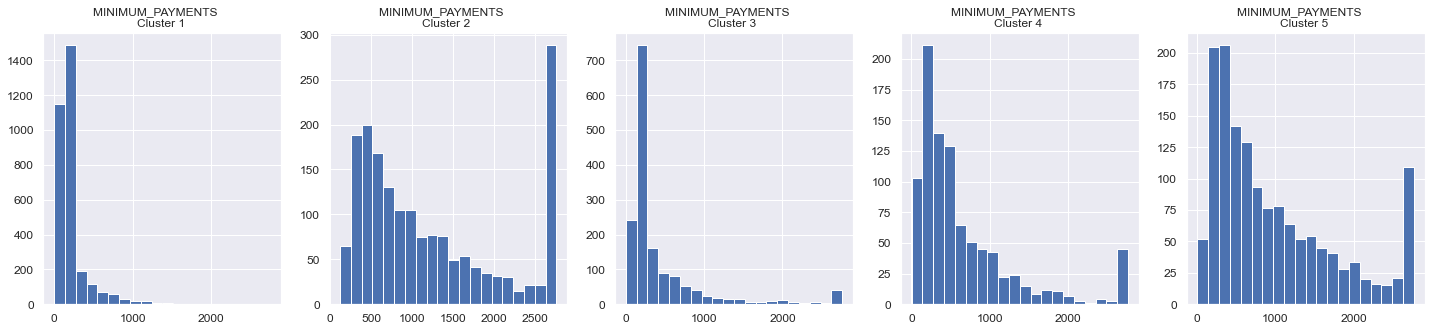

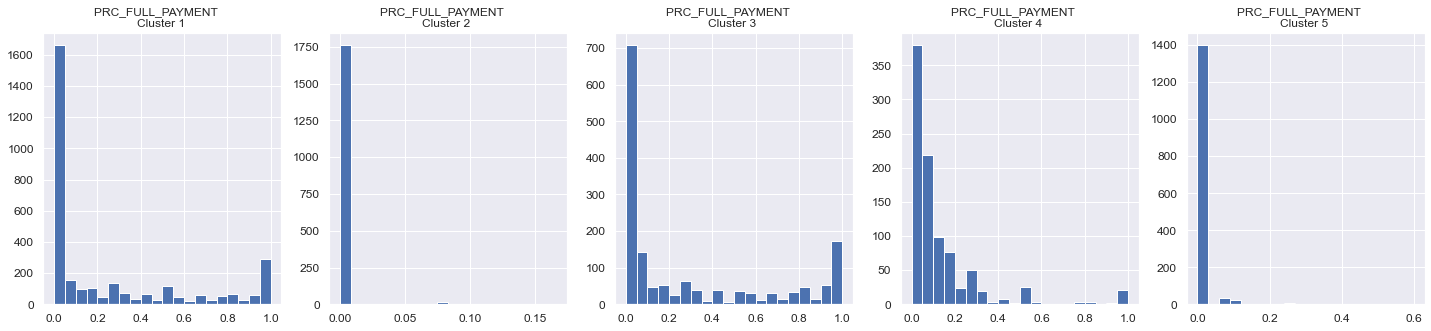

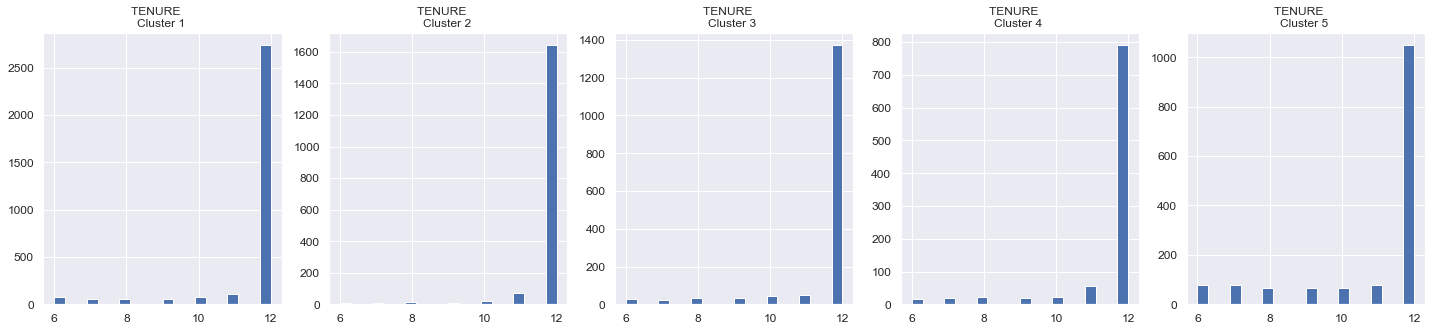

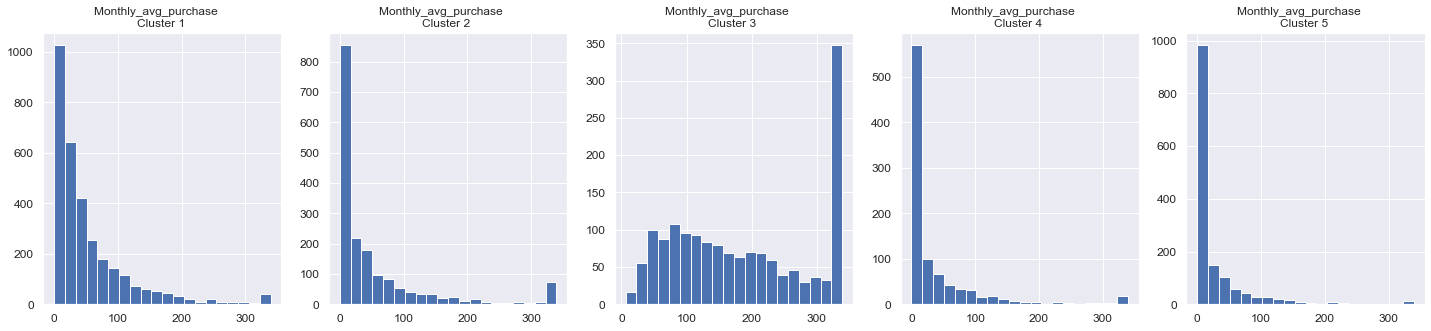

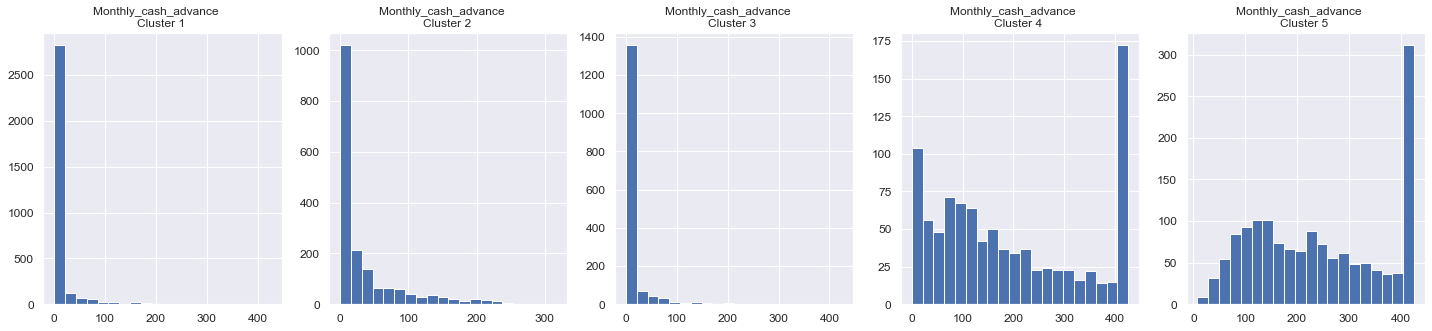

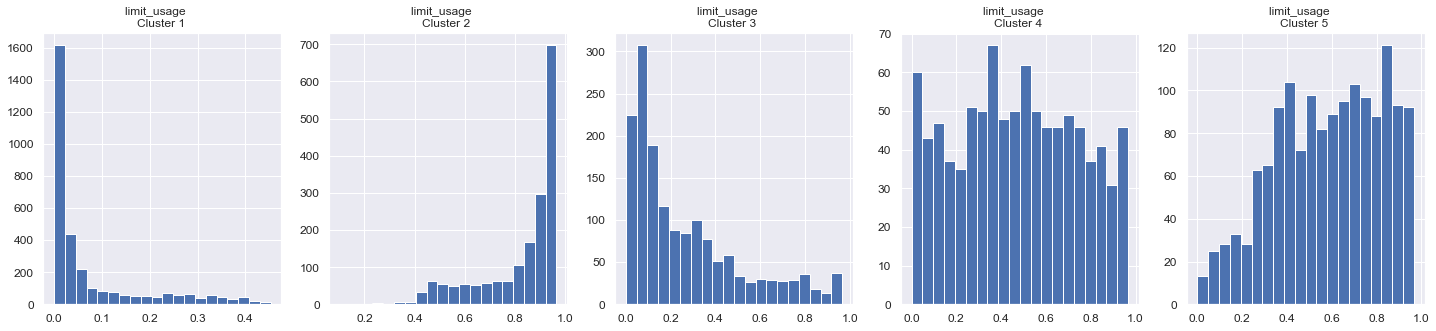

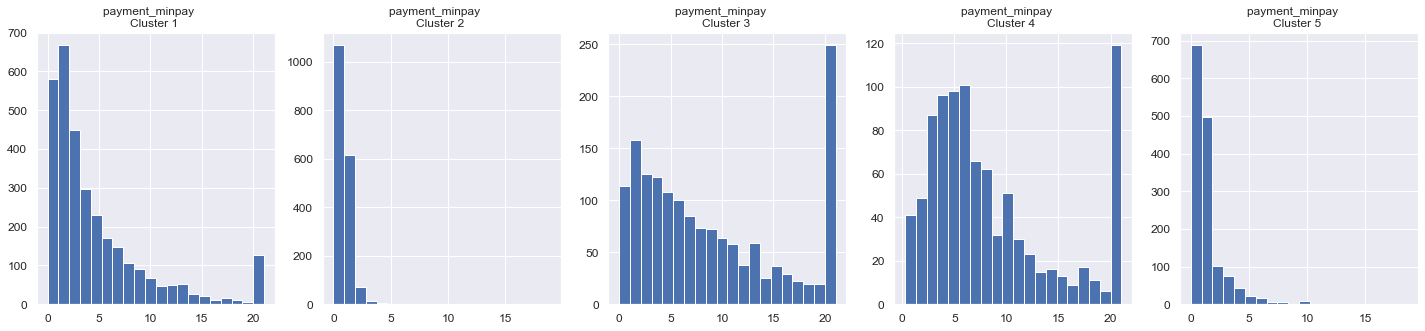

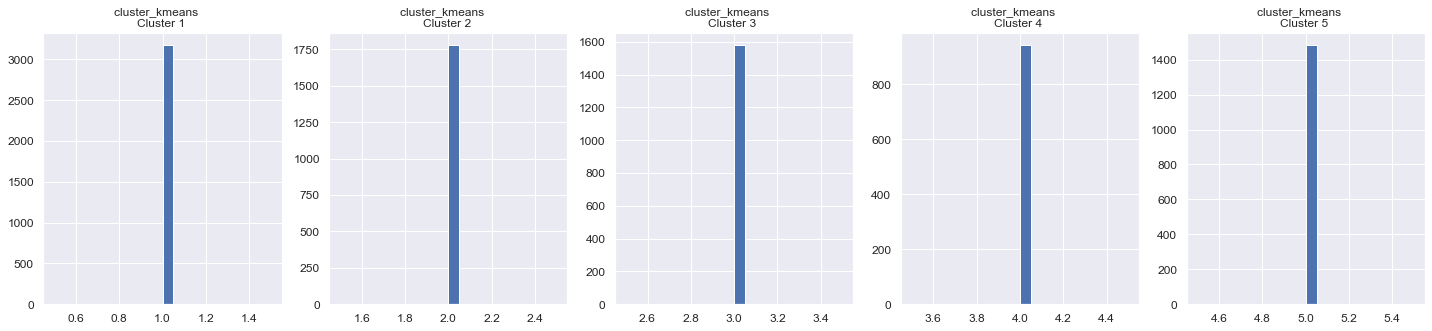

In [56]:
# Plot the histogram of various clusters
for i in credit.columns:
  plt.figure(figsize = (35, 5))
  for j in range(1,6):
    plt.subplot(1,7,j+1)
    cluster = credit[credit['cluster_kmeans'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

### Graficando los cluster con componentes principales

In [57]:
# PCA 2 dimensions

pca = PCA(n_components=2).fit(credit)
df_pca2 = pca.fit_transform(credit)
print("original shape:   ", credit.shape)
print("transformed shape:", df_pca2.shape)

original shape:    (8950, 22)
transformed shape: (8950, 2)


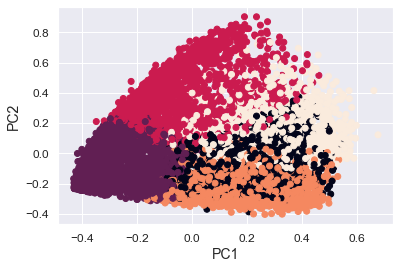

In [58]:
plt.scatter(dd[0], dd[1],c = KMeans(n_clusters=5, random_state=40).fit_predict(dd), cmap =None) 
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

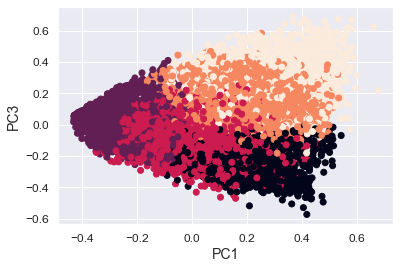

In [59]:
plt.scatter(dd[0], dd[2],c = KMeans(n_clusters=5, random_state=40).fit_predict(dd), cmap =None) 
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.show()

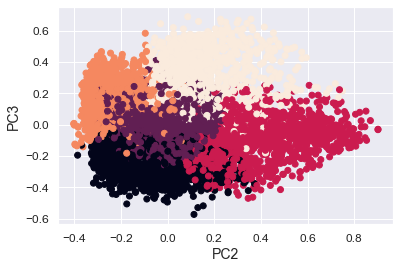

In [60]:
plt.scatter(dd[1], dd[2],c = KMeans(n_clusters=5, random_state=40).fit_predict(dd), cmap =None) 
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.show()

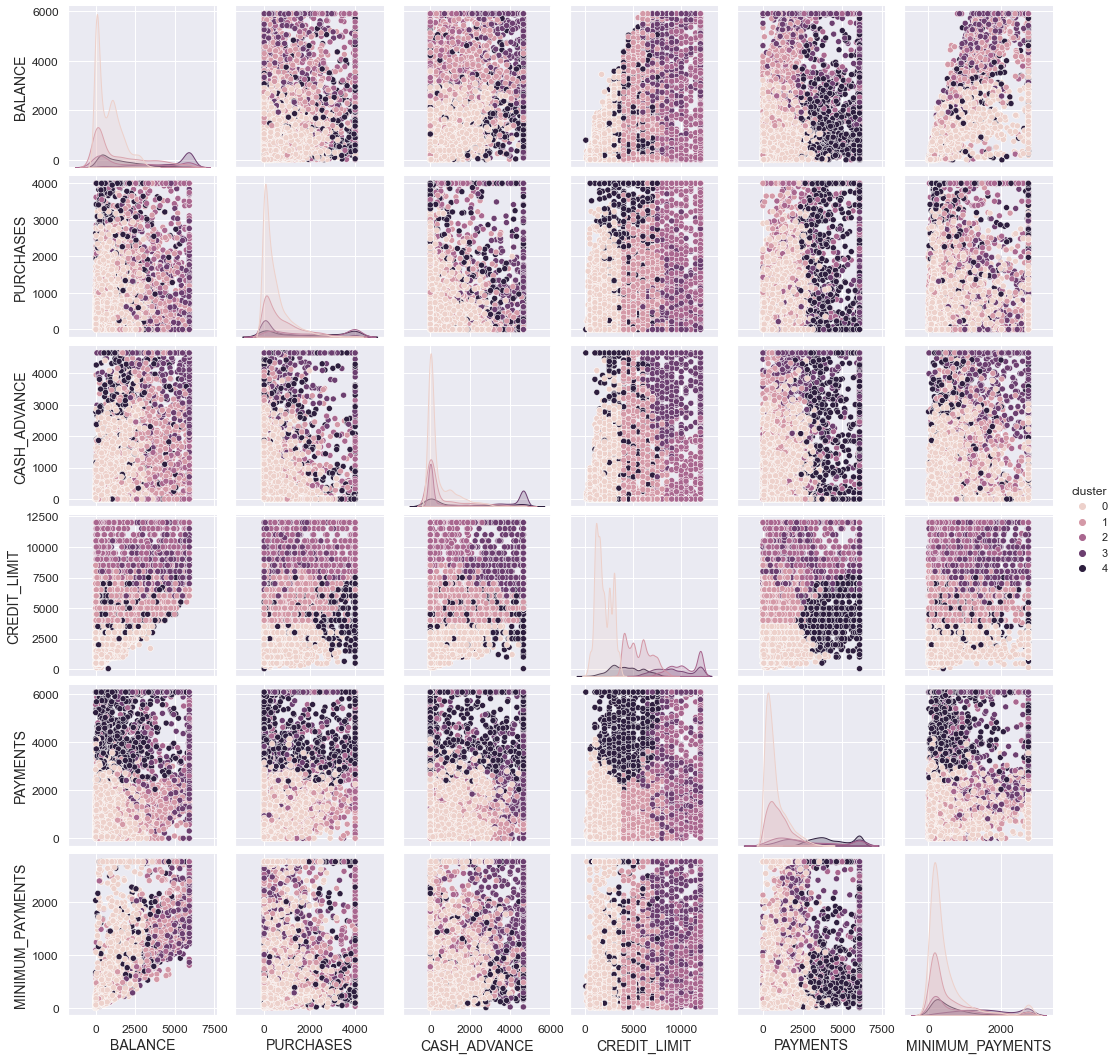

In [61]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]
kmeans = KMeans(n_clusters=5, init="k-means++", n_init=10, max_iter=300) 
best_vals = credit[best_cols].iloc[ :, 1:].values
y_pred = kmeans.fit_predict( best_vals )

credit["cluster"] = y_pred
best_cols.append("cluster")
sns.pairplot( credit[ best_cols ], hue="cluster", diag_kws={'bw': 0.2})

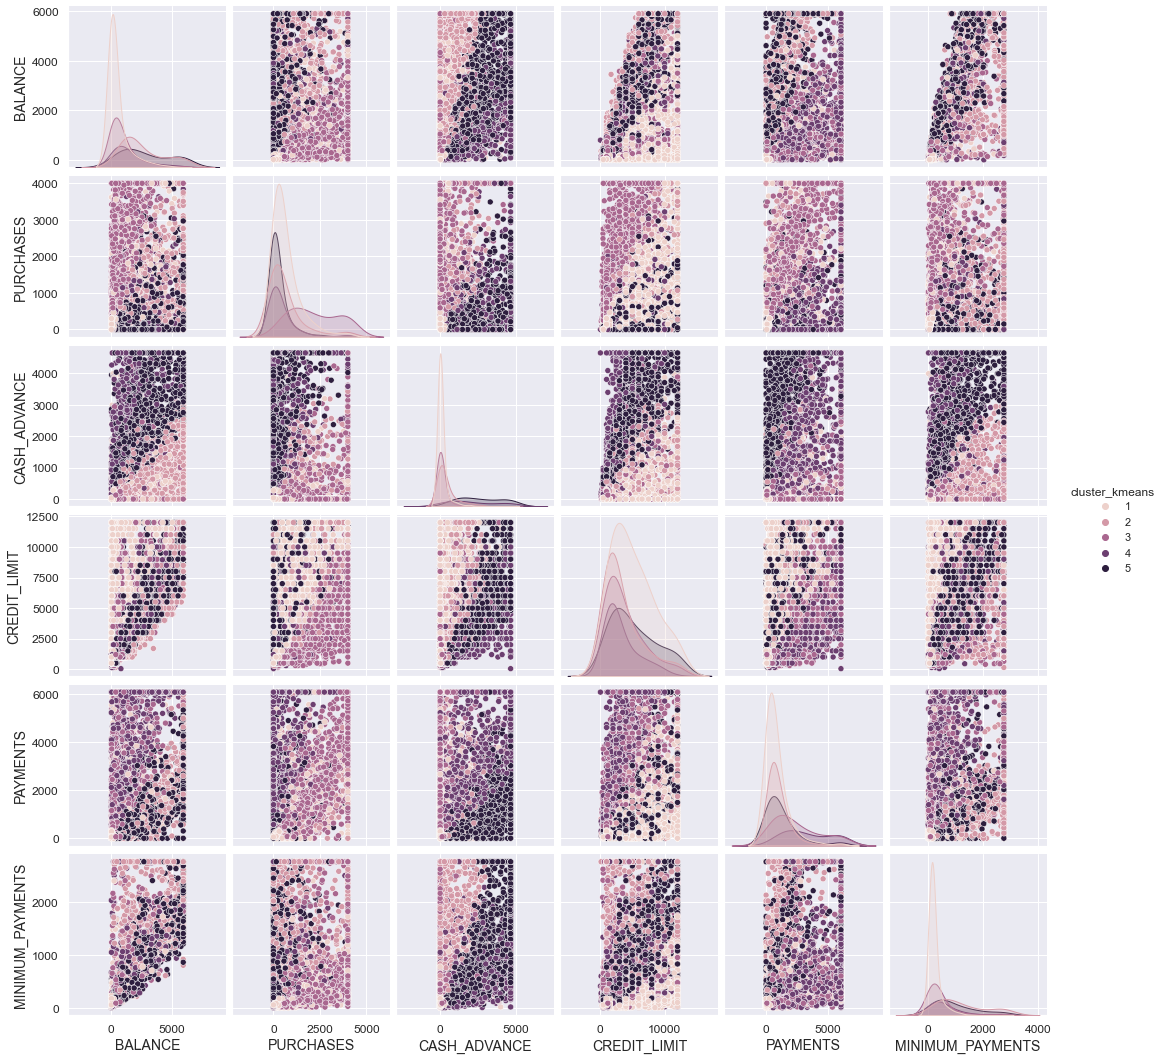

In [62]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]
best_cols.append("cluster_kmeans")
sns.pairplot( credit[best_cols], hue="cluster_kmeans", diag_kws={'bw': 0.5})

## Cluster jerarquico

In [63]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [64]:
siliuette_list_hierarchical = []

for cluster in range(2,20,2):
    for linkage_method in ['ward', 'average', 'complete']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean',n_clusters=cluster).fit_predict(dd)
        sil_score = metrics.silhouette_score(dd, agglomerative, metric='euclidean')
        siliuette_list_hierarchical.append((cluster, sil_score, linkage_method, len(set(agglomerative)) ) )
        
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['cluster', 'sil_score','linkage_method', 'number_of_clusters'])

In [65]:
df_hierarchical.sort_values('sil_score', ascending=False)

cluster  sil_score linkage_method  number_of_clusters
1         2   0.350770        average                   2
0         2   0.313112           ward                   2
3         4   0.307929           ward                   4
4         4   0.303634        average                   4
7         6   0.301611        average                   6
11        8   0.294750       complete                   8
9         8   0.293986           ward                   8
10        8   0.291988        average                   8
6         6   0.286396           ward                   6
18       14   0.282042           ward                  14
12       10   0.277381           ward                  10
15       12   0.276661           ward                  12
13       10   0.274133        average                  10
16       12   0.268716        average                  12
14       10   0.265191       complete                  10
19       14   0.265140        average                  14
22       16   0.254345        average                  16
25       18   0.253384        average                  18
20       14   0.250197       complete                  14
17       12   0.249685       complete                  12
8         6   0.246331       complete                   6
23       16   0.241158       complete                  16
26       18   0.239069       complete                  18
21       16   0.232556           ward                  16
24       18   0.225518           ward                  18
2         2   0.220152       complete                   2
5         4   0.188453       complete                   4

In [66]:
hierarchical_= AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=4).fit_predict(dd)  ## Change 4 ----- OJOOOOOOOOOOOOOOOOO

In [67]:
Hierarchical_Silhouette_Score = metrics.silhouette_score(dd, hierarchical_, metric='euclidean')

In [68]:
credit['cluster_hierarchical'] = hierarchical_ 

In [69]:
credit["cluster_hierarchical"] = credit["cluster_hierarchical"] + 1
credit.groupby("cluster_hierarchical").agg({"cluster_hierarchical": "count"})

cluster_hierarchical
cluster_hierarchical                      
1                                      680
2                                     1086
3                                     2802
4                                        1
5                                     4028
6                                      353

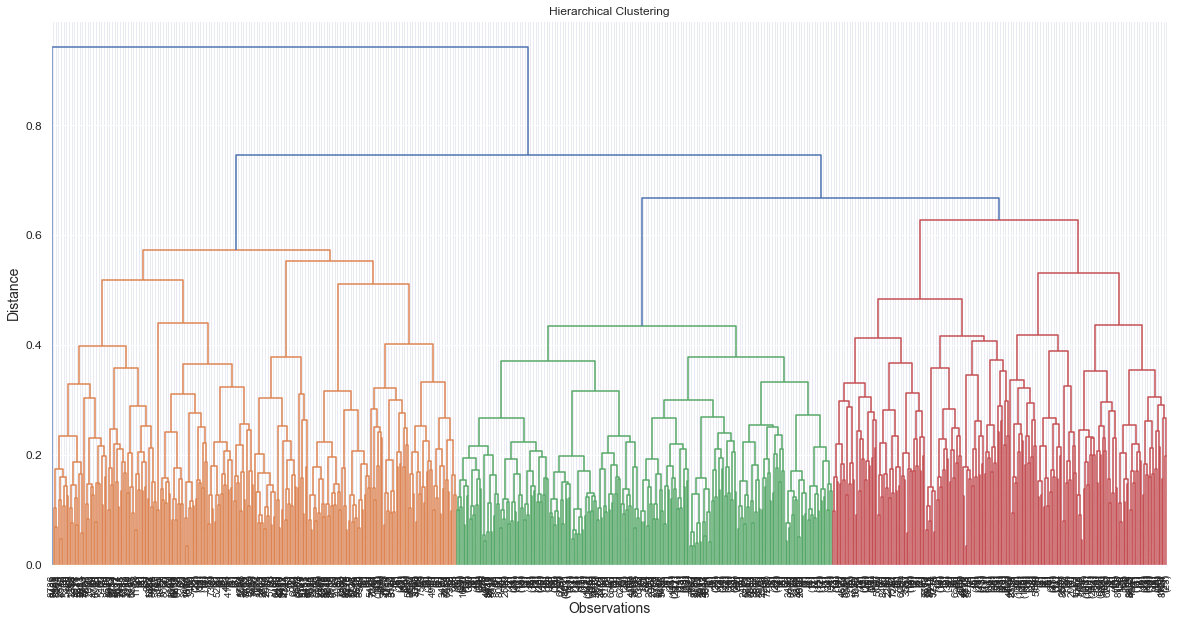

In [70]:
#### Cluster jerarquico 2
# Average Linkage Method
hc_average = linkage(dd, "average")

plt.figure(figsize=(20, 10))
plt.title("Hierarchical Clustering")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average,
           leaf_font_size=10, 
           p=10,
           show_contracted=True,
          truncate_mode='level')
plt.show()

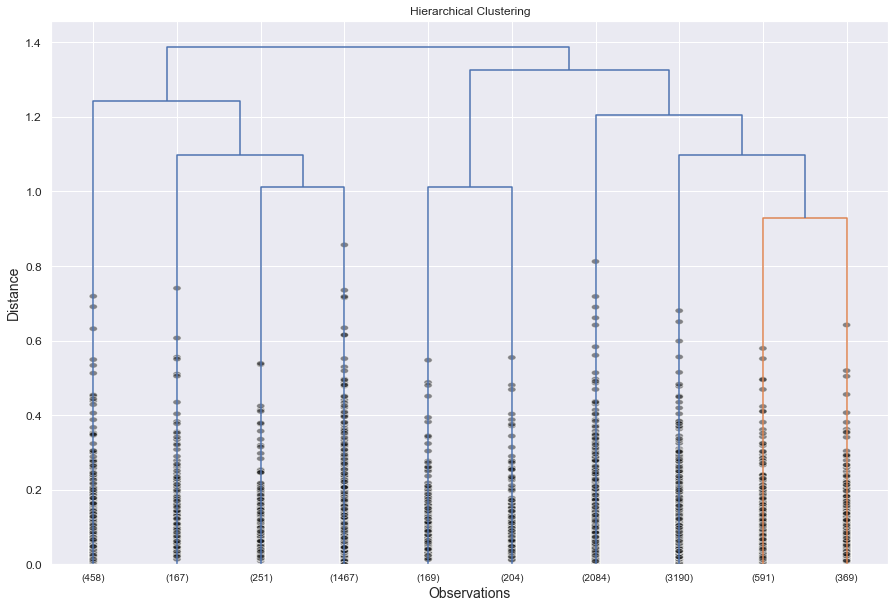

In [71]:
# Complete Linkage Method
hc_complete = linkage(dd, "complete")

plt.figure(figsize=(15, 10))
plt.title("Hierarchical Clustering")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.show();

## DBSCAN

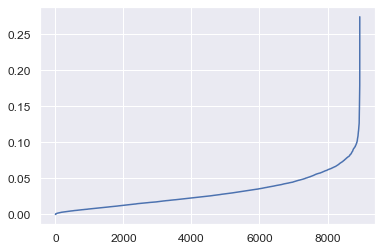

In [72]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(dd)
distances, indices = nbrs.kneighbors(dd)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [73]:
from sklearn.cluster import DBSCAN

siliuette_list_dbscan = []

for eps in np.arange(0.01,0.15,0.01):
    for min_sample in range(2,10):
        dbscan = DBSCAN(eps=eps, min_samples= min_sample)
        dbscan.fit(dd)
        sil_score = metrics.silhouette_score(dd, dbscan.labels_, metric='euclidean')
        siliuette_list_dbscan.append((eps, min_sample, sil_score, len(set(dbscan.labels_))) )
        
df_dbscan = pd.DataFrame(siliuette_list_dbscan, columns=['eps', 'min_samples', 'sil_score', 'number_of_clusters'])

In [74]:
df_dbscan.sort_values('sil_score', ascending=False).head()

eps  min_samples  sil_score  number_of_clusters
107  0.14            5   0.282881                   2
106  0.14            4   0.281801                   2
99   0.13            5   0.265364                   2
108  0.14            6   0.257179                   2
109  0.14            7   0.255860                   2

In [75]:
np.arange(0.01,0.15,0.01)

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14])

## Clarans

In [78]:
!pip install pyclustering

  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395105 sha256=be0d82f2c08657401492bd12919b30053c422ea9f1a2ce238f21d99d1b12bf7f
  Stored in directory: c:\users\villacorta\appdata\local\pip\cache\wheels\dc\25\8b\072b221a5cff4f04e7999d39ca1b6cb5dad702cc3e1da951d4
Successfully built pyclustering


In [79]:
from pyclustering.cluster.clarans import clarans

In [80]:
#Data a Lista:
X = dd.sample(n=100, replace=False)
X_list =X.iloc[:, :].values

In [81]:
#numlocal: Número de interaciones para que converga
#maxneighbor : Maximo número de vecinos

from pyclustering.utils import timedcall

M_Clarans= clarans(X_list, number_clusters=4,numlocal=6, maxneighbor=4)

#calls the clarans method 'process' to implement the algortihm
(ticks, result) = timedcall(M_Clarans.process);
print("Execution time : ", ticks, "\n");

Execution time :  3.162619799999902 



In [82]:
clusters = M_Clarans.get_clusters()
print("Index of the points that are in a cluster : ",clusters)

Index of the points that are in a cluster :  [[8, 14, 15, 43, 49, 50, 52, 53, 54, 60, 67, 73, 81, 84, 87, 88], [1, 3, 9, 12, 16, 19, 20, 22, 40, 41, 42, 45, 48, 58, 59, 62, 66, 70, 75, 76, 77, 79, 89, 90, 94, 96, 99], [0, 2, 4, 5, 6, 7, 23, 24, 28, 33, 36, 39, 46, 47, 55, 56, 65, 71, 78, 80, 82, 85, 86, 92, 95, 98], [10, 11, 13, 17, 18, 21, 25, 26, 27, 29, 30, 31, 32, 34, 35, 37, 38, 44, 51, 57, 61, 63, 64, 68, 69, 72, 74, 83, 91, 93, 97]]


In [83]:
cluster_1=pd.DataFrame(X.iloc[clusters[0],:])
cluster_1['Cluster']=1

cluster_2=pd.DataFrame(X.iloc[clusters[1],:])
cluster_2['Cluster']=2

cluster_3=pd.DataFrame(X.iloc[clusters[2],:])
cluster_3['Cluster']=3

cluster_4=pd.DataFrame(X.iloc[clusters[3],:])
cluster_4['Cluster']=4

In [84]:
data_final=pd.concat([cluster_1,cluster_2,cluster_3,cluster_4])
data_final.groupby(['Cluster'])['Cluster'].count()

Cluster
1    16
2    27
3    26
4    31
Name: Cluster, dtype: int64

## K_medois parte 2

In [85]:
#!pip install https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip

In [88]:
!pip install scikit-learn-extra

In [89]:
from sklearn_extra.cluster import KMedoids

kMedoids = KMedoids(n_clusters = 4, random_state = 0)
kMedoids.fit(dd)
y_kmed = kMedoids.fit_predict(dd)

In [90]:
y_kmed

array([1, 3, 1, ..., 1, 1, 0], dtype=int64)

In [91]:
kMedoids.inertia_

2336.3756442676518

In [92]:
from sklearn.metrics import silhouette_samples, silhouette_score
kMedoids = KMedoids(n_clusters = 4, random_state = 0)
kMedoids.fit(dd)
y_kmed = kMedoids.fit_predict(dd)
silhouette_avg = silhouette_score(dd, y_kmed)
print(silhouette_avg)

0.3134414155649008


In [93]:
sample_silhouette_values = silhouette_samples(dd, y_kmed)
for i in range(4):
    ith_cluster_silhouette_values = sample_silhouette_values[y_kmed == i]
    print(np.mean(ith_cluster_silhouette_values))

0.22517452858844306
0.5257828852578796
0.0756947908611161
0.30373209388297895


In [94]:
sw = []

for i in range(2, 11):
    kMedoids = KMedoids(n_clusters = i, random_state = 0)
    kMedoids.fit(dd)
    y_kmed = kMedoids.fit_predict(dd)
    silhouette_avg = silhouette_score(dd, y_kmed)
    sw.append(silhouette_avg)
    

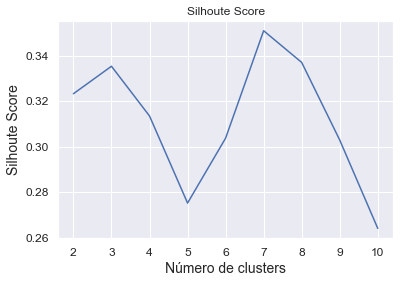

In [95]:
plt.plot(range(2, 11), sw)
plt.title('Silhoute Score')
plt.xlabel('Número de clusters')
plt.ylabel('Silhoute Score')      #within cluster sum of squares
plt.show()

### Spectral Clustering

In [96]:
from sklearn.cluster import SpectralClustering 
# Building the clustering model 
spectral_model_rbf = SpectralClustering(n_clusters = 4, affinity ='rbf') 
  
# Training the model and Storing the predicted cluster labels 
labels_rbf = spectral_model_rbf.fit_predict(dd)

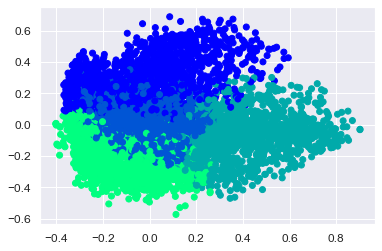

In [97]:
# Visualizing the clustering 
plt.scatter(dd[1], dd[2],  
           c = SpectralClustering(n_clusters = 4, affinity ='rbf') .fit_predict(dd), cmap =plt.cm.winter) 
plt.show() 

In [98]:
from sklearn.cluster import SpectralClustering 
# Building the clustering model 
spectral_model_nn = SpectralClustering(n_clusters = 4, affinity ='nearest_neighbors') 
  
# Training the model and Storing the predicted cluster labels 
labels_nn = spectral_model_rbf.fit_predict(dd)

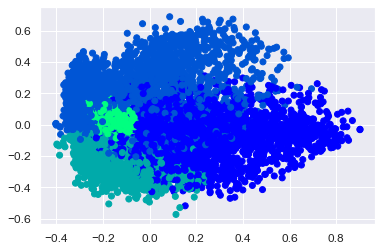

In [99]:
# Visualizing the clustering 
plt.scatter(dd[1], dd[2],  
           c = SpectralClustering(n_clusters = 4, affinity ='nearest_neighbors') .fit_predict(dd), cmap =plt.cm.winter) 
plt.show() 

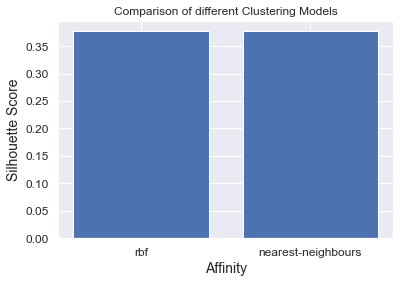

[0.37725321326696454, 0.37729433442616966]


In [100]:
# List of different values of affinity 
affinity = ['rbf', 'nearest-neighbours'] 
  
# List of Silhouette Scores 
s_scores = [] 
  
# Evaluating the performance 
s_scores.append(silhouette_score(dd, labels_rbf)) 
s_scores.append(silhouette_score(dd, labels_nn)) 
  
# Plotting a Bar Graph to compare the models 
plt.bar(affinity, s_scores) 
plt.xlabel('Affinity') 
plt.ylabel('Silhouette Score') 
plt.title('Comparison of different Clustering Models') 
plt.show() 

print(s_scores)

# Segmentación con Imputación de OutLiers

In [101]:
#Handling Outliers - at 99%tile or 95%tile if required 
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.95))
    x = x.clip(lower=x.quantile(0.01))
    return x

In [102]:
cust_data=credit.apply(lambda x: outlier_capping(x))

In [103]:
cust_data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   4643.580882             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000               0.0            2.0        1000.0   
1                0.250000               4.0            0.0        7000.0   
2                0.000000               0.0           12.0        7500.0   
3                0.083333               1.0            1.0        7500.0   
4                0.000000               0.0            1.0        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  \
0   201.802084        139.509787          0.000000    12.0   
1  4103.032597       1072.340217          0.222222    12.0   
2   622.066742        627.284787          0.000000    12.0   
3     0.000000        448.208854          0.000000    12.0   
4   678.334763        244.791237          0.000000    12.0   

   Monthly_avg_purchase  Monthly_cash_advance  limit_usage  payment_minpay  \
0              7.950000              0.000000     0.040901        1.446508   
1              0.000000            425.498746     0.457495        3.826241   
2             64.430833              0.000000     0.332687        0.991682   
3            124.916667             17.149001     0.222223        0.000000   
4              1.333333              0.000000     0.681429        2.771075   

   cluster_kmeans  cluster  cluster_hierarchical  
0               1        0                     5  
1               5        3                     2  
2               1        1                     5  
3               1        1                     5  
4               2        0                     3

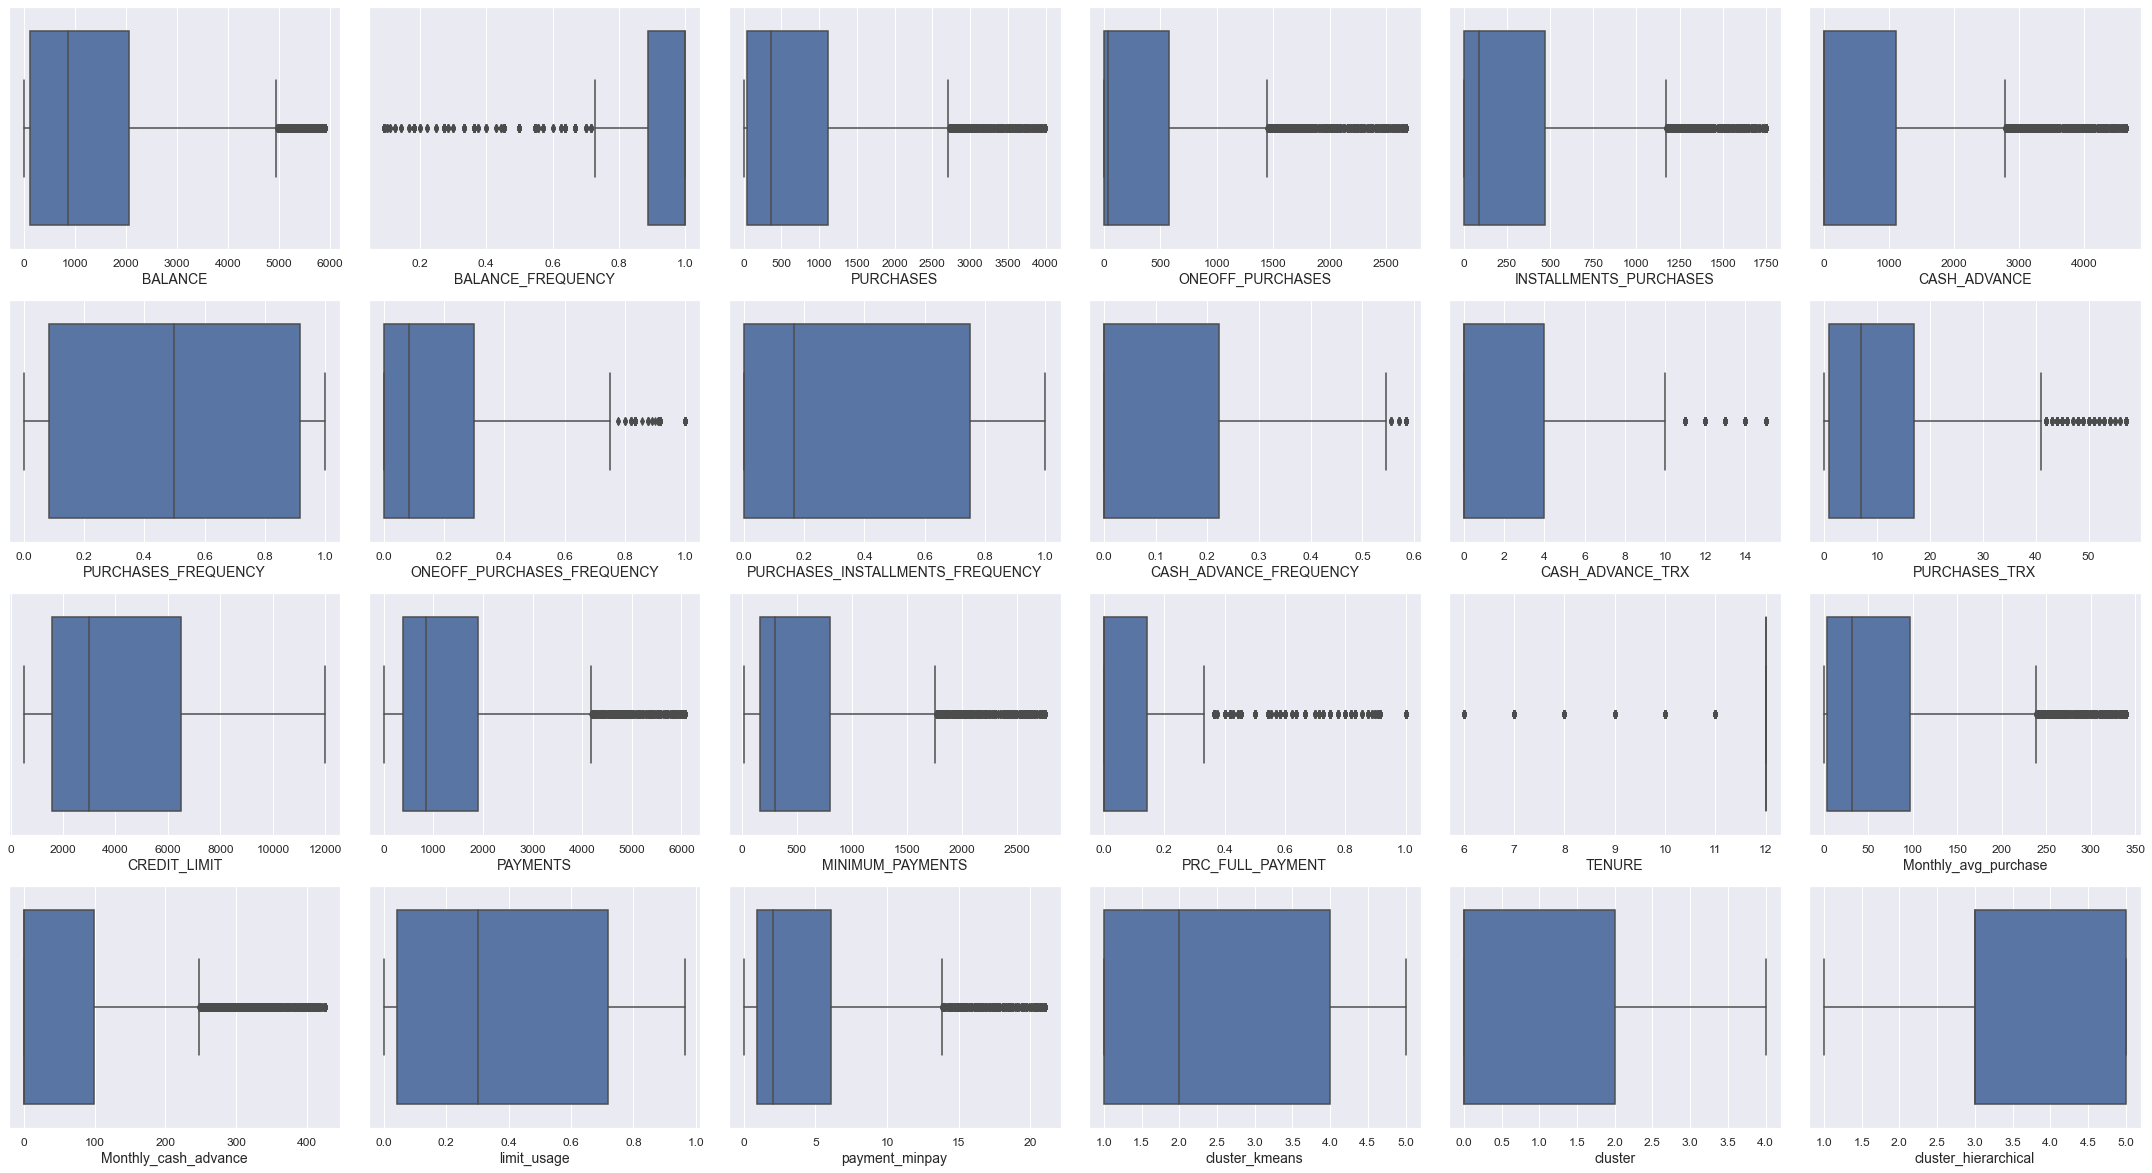

In [117]:
fig = plt.figure(figsize=(30, 20))
for idx, col in enumerate(cust_data.columns, 1):
    ax = fig.add_subplot(5, 6, idx)
    sns.boxplot(x=cust_data[col], ax=ax)

plt.tight_layout()

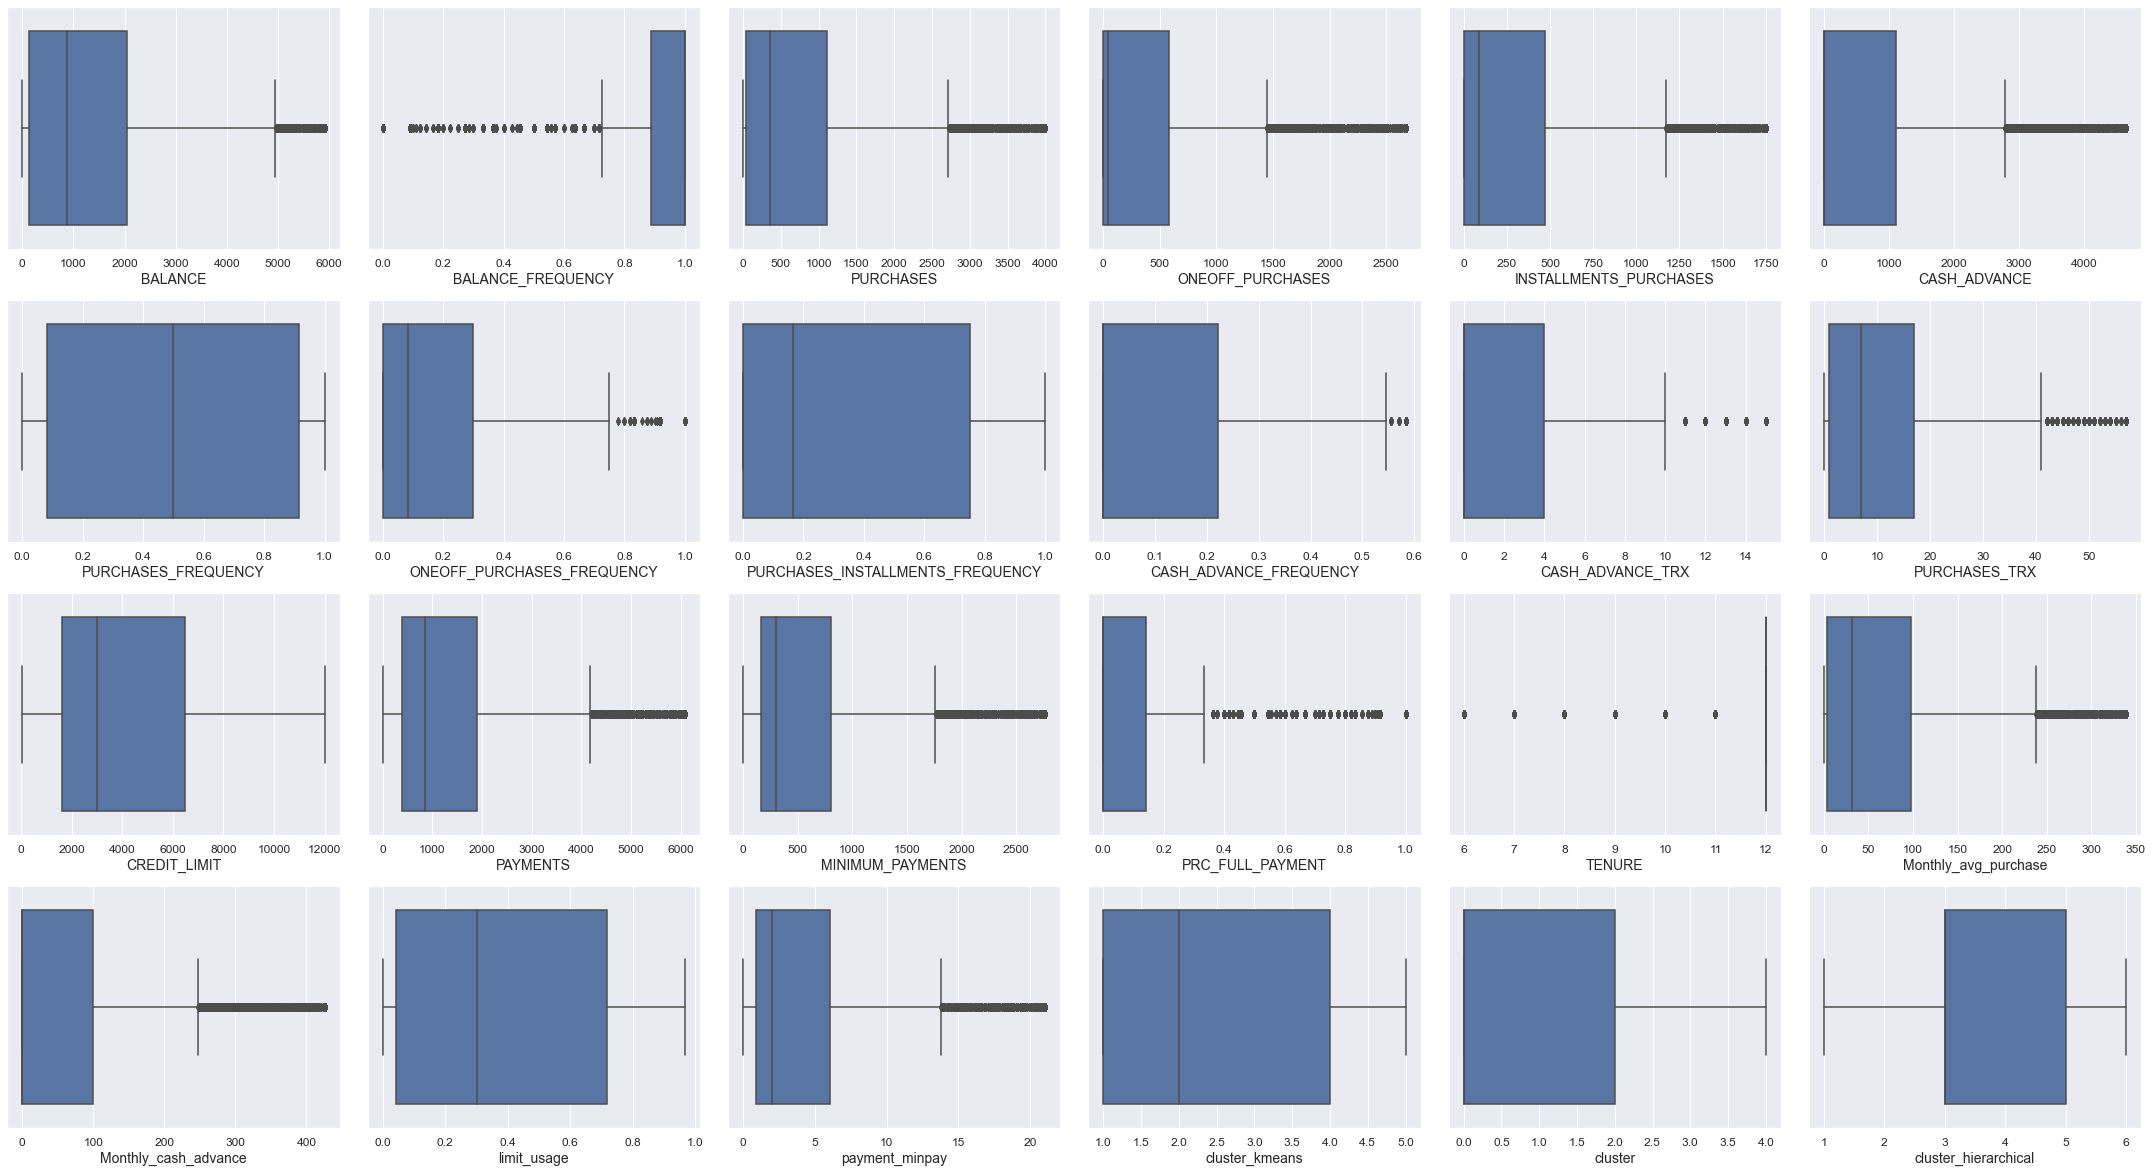

In [105]:
fig = plt.figure(figsize=(30, 20))
for idx, col in enumerate(credit.columns, 1):
    ax = fig.add_subplot(5, 6, idx)
    sns.boxplot(x=credit[col], ax=ax)

plt.tight_layout()

In [106]:
cr_scaled = normalize(cust_data) 

In [107]:
#We have 21features so our n_component will be 21.
pc=PCA(n_components=21)
cr_pca=pc.fit(cr_scaled)

In [108]:
var_ratio={}
for n in range(1,22):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(cr_scaled)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)

In [109]:
var_ratio

{1: 0.35508332672659654,
 2: 0.6385813283049739,
 3: 0.8058565710282408,
 4: 0.8859140940946963,
 5: 0.945892181660121,
 6: 0.9879536667614737,
 7: 0.9988516773613831,
 8: 0.9997804452981841,
 9: 0.9998856767675498,
 10: 0.9999336160357948,
 11: 0.9999702617141085,
 12: 0.9999899319240492,
 13: 0.9999953316295199,
 14: 0.9999982981758716,
 15: 0.9999992928846133,
 16: 0.9999997520274573,
 17: 0.9999998257218855,
 18: 0.9999998937959569,
 19: 0.9999999349470634,
 20: 0.9999999695333797,
 21: 0.9999999843248863}

In [110]:
# Since, we just need PCA to visualize data, we can simply reduce dimensions to 2 or 3. 
# Remember, you can also reduce the Xs to lower dimensions and then apply clustering models.
# Just make sure, you're not losing much variance.
pca_2d = PCA(n_components=3)
Xn_2d = pca_2d.fit_transform(cr_scaled)
normalize_Xs_because = PCA(n_components=7).fit_transform(cr_scaled)

In [111]:
dd=pd.DataFrame(Xn_2d)

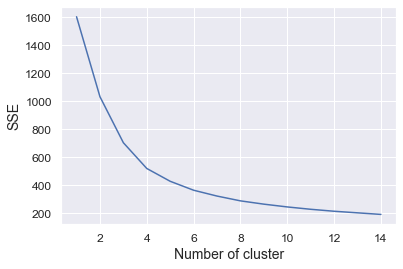

In [112]:
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(dd)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

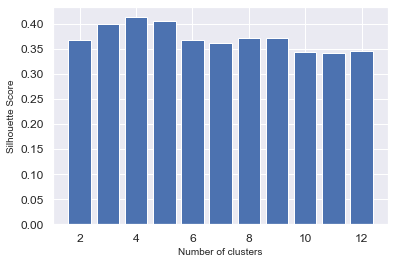

In [113]:
silhouette_scores = []

for n_cluster in range(2, 13):
    silhouette_scores.append( 
        silhouette_score(dd, KMeans(n_clusters = n_cluster).fit_predict(dd))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11, 12] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [114]:
silhouette_score(dd, KMeans(n_clusters = 5).fit_predict(dd))

0.40490840837074754

Estimated number of clusters: 5
Estimated number of noise points: 86
Homogeneity: 0.724
Completeness: 0.669
V-measure: 0.695
Adjusted Rand Index: 0.539
Adjusted Mutual Information: 0.689
Silhouette Coefficient: 0.392


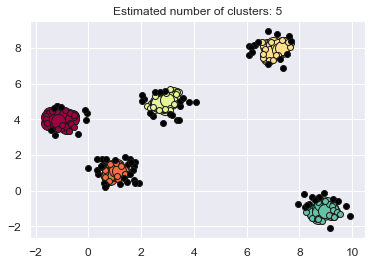

In [118]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
# Generate sample data
centers = [[1, 1], [-1, 4], [9, -1], [7, 8],[3, 5]]
dd, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.4,random_state=0)
##X = StandardScaler().fit_transform(X)
db = DBSCAN(eps=0.3, min_samples=10).fit(dd)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"% metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels, average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(dd, labels))

import matplotlib.pyplot as plt
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = dd[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    xy = dd[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()